# Setting up

In [109]:
# Default imports
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML
import joblib
import os

# Pre processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import f_classif, chi2
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from scipy.stats import shapiro, boxcox, pearsonr, anderson
from scipy.special import inv_boxcox
from scipy.stats import kurtosis, skew

# Sampling
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline, make_pipeline as imb_make_pipeline

# Model evaluation
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, RocCurveDisplay
from sklearn.metrics.cluster import contingency_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict
from hyperopt import hp, fmin, tpe, space_eval
from sklearn.decomposition import PCA
import shap


# Models
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, MeanShift, OPTICS, Birch, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
import xgboost as xgboost
import lightgbm as lgboost
import catboost as catboost

# PyTorch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
import torch
import torch.nn.functional as F
from hyperopt import Trials

import warnings
warnings.filterwarnings('ignore')


In [110]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [111]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Application of Machine Learning and Deep Learning models

- Make an introduction
- Methodology : Now that we have extracted interesting features, we are going to optimize them for our algorithms through a process called feature engineering (with transformations and new features). Then, we are going to test several algorithms on our data in order to predict the bug type. We will try to use different parts of our feature engineering process for each algorithm in order to find which processes work best for each algorithm. We will proceed from the algorithms which we expect to have the worse results to the algorithm which we expect to be the most effective.

# A - Feature Engineering

# 1. Initial preparation of data

#### Load the data and variables

In [112]:
path = 'data/'
data = pd.read_csv(path + "processed_data.csv",header=0,index_col='ID')
print(data.shape)
data.head(10)

(249, 138)


,bug_type,species,nb_pixels_ratio,image_symmetry_index,mask_bb_symmetry_index,roundness,mean_centroid_distance,std_centroid_distance,max_centroid_distance,min_centroid_distance,skewness_centroid_distance,kurtosis_centroid_distance,aspect_ratio,mask_area,mask_perimeter,mask_compactness,hull_area,hull_to_insect_area_ratio,hull_convexity,hull_triangle_similarity,ellipse_angle,ellipse_axis_ratio,ellipse_eccentricity,ellipse_variance,axis_least_inertia_x,axis_least_inertia_y,rectangularity,body_parts_mean_length,body_parts_max_length,body_parts_std_length,body_parts_spread,rest_entropy,mask_entropy,red_mask_min,red_rest_min,red_mask_max,red_rest_max,red_mask_mean,red_rest_mean,red_mask_median,red_rest_median,red_mask_std,red_rest_std,red_mask_q1,red_rest_q1,red_mask_q3,red_rest_q3,green_mask_min,green_rest_min,green_mask_max,green_rest_max,green_mask_mean,green_rest_mean,green_mask_median,green_rest_median,green_mask_std,green_rest_std,green_mask_q1,green_rest_q1,green_mask_q3,green_rest_q3,blue_mask_min,blue_rest_min,blue_mask_max,blue_rest_max,blue_mask_mean,blue_rest_mean,blue_mask_median,blue_rest_median,blue_mask_std,blue_rest_std,blue_mask_q1,blue_rest_q1,blue_mask_q3,blue_rest_q3,hue_mask_min,hue_rest_min,hue_mask_max,hue_rest_max,hue_mask_mean,hue_rest_mean,hue_mask_median,hue_rest_median,hue_mask_std,hue_rest_std,hue_mask_q1,hue_rest_q1,hue_mask_q3,hue_rest_q3,saturation_mask_min,saturation_rest_min,saturation_mask_max,saturation_rest_max,saturation_mask_mean,saturation_rest_mean,saturation_mask_median,saturation_rest_median,saturation_mask_std,saturation_rest_std,saturation_mask_q1,saturation_rest_q1,saturation_mask_q3,saturation_rest_q3,value_mask_min,value_rest_min,value_mask_max,value_rest_max,value_mask_mean,value_rest_mean,value_mask_median,value_rest_median,value_mask_std,value_rest_std,value_mask_q1,value_rest_q1,value_mask_q3,value_rest_q3,fourier_descriptor_real_0,fourier_descriptor_imag_0,fourier_descriptor_real_1,fourier_descriptor_imag_1,fourier_descriptor_real_2,fourier_descriptor_imag_2,fourier_descriptor_real_3,fourier_descriptor_imag_3,fourier_descriptor_real_4,fourier_descriptor_imag_4,fourier_descriptor_real_5,fourier_descriptor_imag_5,fourier_descriptor_real_6,fourier_descriptor_imag_6,fourier_descriptor_real_7,fourier_descriptor_imag_7,fourier_descriptor_real_8,fourier_descriptor_imag_8,fourier_descriptor_real_9,fourier_descriptor_imag_9,orthogonal_lines_ratio
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bee,Apis mellifera,0.007199,65.842518,70.059270,0.046706,245.172338,55.348483,362.548639,127.671981,-0.057930,-0.817833,0.811060,172773,6818,0.046706,265227.5,0.651414,0.286969,0.826408,4.100518,0.878376,0.477971,0.099935,-0.840749,0.541425,0.502645,434.179165,1566.469267,545.078940,252.452196,7.460814,6.967513,5,1,203,255,66.750522,107.403577,54,128,47.329372,61.073311,26,43,99,156,3,2,199,255,53.387028,105.378123,36,123,44.415601,58.068684,17,49,81,151,0,0,186,255,38.786193,84.573068,23,85,35.298702,57.198890,13,28,54,132,0,0,178,179,22.955340,42.776885,14,27,35.494402,46.076375,10,21,20,38,0,0,255,255,113.963825,66.078872,115.0,51,41.474470,50.351267,83,26,143,102,5,3,203,255,66.826408,109.176003,55,128,47.295039,59.737595,26,50,99,156,0.802350,0.596853,-0.025349,-0.008629,-0.013720,0.006373,-0.001826,-0.004257,-0.010642,0.004364,-0.001702,0.008064,-0.001693,0.002286,-0.003509,0.004708,-0.000954,0.001356,-0.002313,0.000987,0.679289
2,Bee,Apis mellifera,0.008306,68.896841,40.143673,0.048440,279.998031,85.163883,478.802953,108.009513,-0.063210,-0.616582,0.652482,199332,7191,0.048440,350945.5,0.567986,0.320907,0.997932,5.416759,0.568091,0.822966,0.090493,-0.965743,0.259500,0.426842,632.800093,4440.118453,1357.730195,350.976352,7.471152,6.811326,2,0,248,255,62.015547,101.106455,54,120,41.367330,61.737563,25,36,95,151,2,1,251,255,50.140876,98.708295,32,116,41.829106,58.443197,16,42,81,145,0,0,244,255,34.0956

In [113]:
RANDOM_STATE = 10

### a) Removal of useless or negatively impactful information

In [114]:
data.bug_type.value_counts()

bug_type
Bee          115
Bumblebee    100
Butterfly     15
Hover fly      9
Wasp           9
Dragonfly      1
Name: count, dtype: int64

Removing  the row with dragonfly from our main dataset because only 1 sample is not enough to train the model. We will see what to do with it later

In [115]:
dragonfly_data = data[data['bug_type'] == 'Dragonfly']
data = data[data['bug_type'] != 'Dragonfly']

Dropping mask_compactness column because it is the same as roundness

In [116]:
data = data.drop(['mask_compactness'], axis=1)

Dropping columns that are constant and equal to 0 that we identified during visualisation. They are useless since their value doesn't vary

In [117]:
for col in data.columns:
    col_sum = data[col].sum()
    if col_sum == 0:
        print('Dropped column because completely null:', col)
        data.drop(col, axis=1, inplace=True)

Dropped column because completely null: hue_mask_min
Dropped column because completely null: hue_rest_min


#find columns which always have the same value
cols_to_drop = []
for col in X.columns:
    if X[col].nunique() == 1:
        cols_to_drop.append(col)
cols_to_drop

### b) Our process to test algorithms

We will use cross validation to train and test our algorithms because (to complete). We chose a cross validation with 4 splits instead of 5 because of the low number of samples. We will also ensure that our each train and test split of our folds contain a sufficient number of samples from each class, since our target is imbalanced and we want to make sure that we are training and testing our model on predicting all classes. We set this number to 2.

In [118]:
X = data.drop(columns=['bug_type','species'])
scaled_X = StandardScaler().fit_transform(X)
X2 = pd.DataFrame(scaled_X, columns=X.columns)
pca = PCA(n_components=2)
proj_X = pca.fit_transform(scaled_X)
target = 'bug_type'
y = data[target]
labelencoder = LabelEncoder()
y_encoded = labelencoder.fit_transform(y)
classes = np.unique(y)
n_classes = len(classes)

In [119]:
# K Fold for training
cv = StratifiedKFold(n_splits=4, random_state=2, shuffle=True)

def check_splits(X, y, cv, min_samples_per_class_in_train=3, min_samples_per_class_in_test=2):
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Ensure we have at least 2 instances of each class in each set
        for class_name in np.unique(y):
            if class_name == 'Dragonfly':
                continue
            if len(y_train[y_train == class_name]) < min_samples_per_class_in_train:
                print(f"Train set has less than {min_samples_per_class_in_train} instances of class", class_name)
            if len(y_test[y_test == class_name]) < min_samples_per_class_in_test:
                print(f"Test set has less than {min_samples_per_class_in_test} instances of class", class_name)
check_splits(X, y, cv)

##### Utility functions for model evaluation and visualisation

In [120]:
### FEATURE SELECTION VISUALISATION TOOLKIT ###
def make_graph(forest_importances, std, ax, n_features, asc=False):
    forest_importances2 = forest_importances.sort_values(ascending=asc)
    if n_features is not None:
        forest_importances2 = forest_importances2[:n_features]
        std2 = std[:n_features] if std is not None else None

    forest_importances2.plot.bar(yerr=std2, ax=ax)
    way = "Bottom " if asc else "Top "
    ax.set_title("Feature importances using MDI ({0} {1})".format(way, n_features if n_features is not None else ""))
    ax.set_ylabel("Importance")
    plt.xticks(rotation=45, ha='right')
    #ax.xaxis.set_tick_params(rotation=45, ha='right')

def plot_feature_importances(model, X, n_features=50, plot_bottom=True):
    importances = model.feature_importances_
    if hasattr(model, 'estimators_'):
        std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    else:
        std = None  # No standard deviation if the model doesn't support it

    forest_importances = pd.Series(importances, index=X.columns)
    total_n_features = len(X.columns)
    length = 10
    if plot_bottom:
        n = 2
        length *= 2
    else: n=1
    fig, axs = plt.subplots(figsize=(15, length), nrows=n, ncols=1)
    ax = axs if n == 1 else axs[0]
    make_graph(forest_importances, std, ax, n_features, asc=False)
    if n == 2:
        make_graph(forest_importances, std, axs[1], total_n_features - n_features, asc=True)
    fig.tight_layout()
    plt.show()

def plot_shap_values(model, X, n_features=10):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X, plot_type="bar", max_display=X.shape[1]-2)

In [121]:
### MODEL PERFORMANCE VISUALIZATION TOOLKIT ###
def plot_predictions(predicted_class, actual_class):
    global proj_X
    fig, ax = plt.subplots(figsize=(6, 6))
    predicted_class = "predicted_" + predicted_class
    actual_class = "actual_" + actual_class
    print(type(proj_X),  type(predicted_class), type(actual_class))
    sns.scatterplot(x=proj_X[:, 0], y=proj_X[:, 1], hue=predicted_class, style=actual_class, ax=ax)

    # Add labels and legend
    plt.xlabel('PC1 (explained variance: {0})'.format(pca.explained_variance_ratio_[0]))
    plt.ylabel('PC2 (explained variance: {0})'.format(pca.explained_variance_ratio_[1]))
    plt.title('Predicted vs Actual Class')
    plt.legend()

    # Show the plot
    plt.show()

from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_multiclass_roc(y, y_proba, classes, n_classes):
    # Binarize the output
    y_bin = label_binarize(y, classes=classes)
    n_classes = y_bin.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(classes[i], roc_auc[i]))

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC')
    plt.legend(loc="lower right")
    plt.show()

from sklearn.metrics import average_precision_score
def plot_multiclass_precision_recall(y, y_proba, classes, n_classes):
    # Binarize the output
    y_bin = label_binarize(y, classes=classes)
    n_classes = y_bin.shape[1]

    # Create a color cycle to differentiate classes
    colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue'])

    # Set up plot
    plt.figure(figsize=(10, 8))
    lines = []
    labels = []

    # Compute Precision-Recall and plot curve for each class
    for i, color in zip(range(n_classes), colors):
        precision, recall, _ = precision_recall_curve(y_bin[:, i], y_proba[:, i])
        average_precision = average_precision_score(y_bin[:, i], y_proba[:, i])
        l, = plt.plot(recall, precision, color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class {0} (area = {1:0.2f})'.format(classes[i], average_precision))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Multi-class Precision-Recall curve')
    plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14), fontsize=10)
    # adjust legend label size
    
    plt.show()

from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [122]:
### FINAL MODEL EVLUATION FUNCTION ###
def evaluate_predictions(model,y,y_pred, plot, y_proba=None):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    classes = model.classes_ if hasattr(model, 'classes_') else np.unique(y)
    print(classification_report(y, y_pred, target_names=classes))

    # Plot confusion matrix
    cm = confusion_matrix(y, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    if plot :
        if (y_proba is not None):
            plot_multiclass_roc(y, y_proba, classes, n_classes)
            plot_multiclass_precision_recall(y, y_proba, classes, n_classes)
            plot_learning_curve(model, "Learning Curve", X, y, cv=cv, n_jobs=-1)
        actual_model = model.named_steps['model']
        if hasattr(actual_model, 'feature_importances_'):
            plot_shap_values(actual_model, X, n_features=10)
    plt.show()
    return accuracy

search_space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(100)),  # Regularization strength
    'penalty': hp.choice('penalty', [ 'l2']),
    'solver': hp.choice('solver', ['lbfgs', 'liblinear'])
}
log = imbPipeline([ 
    ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space,{}, max_evals=150, scoring='accuracy')
#{'C': 0.02544670436123156, 'penalty': 'l2', 'solver': 'liblinear'}

rf = RandomForestClassifier(random_state=RANDOM_STATE)
pipe = imbPipeline({
    ('scaler', StandardScaler()),
    ('model', rf)
})
evaluate_classifier(pipe, X, y)

In [123]:
### CLASSIFICATION TOOLKIT ###

def evaluate_classifier(pipeline, X, y, plot=False, debug=False, n_jobs=-1, return_score=False, cv=cv):
    # Perform cross-validated prediction
    is_pytorch = pipeline.named_steps['model'].__class__.__name__ == 'PyTorchClassifier'
    if is_pytorch and len(pipeline.named_steps) == 1:
        X2 = X.values
    else:
        X2 = X
    y_pred_cv = cross_val_predict(pipeline, X2, y_encoded, cv=cv, n_jobs=n_jobs)

    # Decode the predictions
    y_pred_cv_decoded = labelencoder.inverse_transform(y_pred_cv)

    if plot and (hasattr(pipeline.named_steps['model'], 'predict_proba')):
        y_proba_cv = cross_val_predict(pipeline, X2, y_encoded, cv=cv, n_jobs=n_jobs, method='predict_proba')
    else:
        y_proba_cv = None
    if debug:
        print("Actual target values:", y)
        print("Predicted target values:", y_pred_cv_decoded)
        if y_proba_cv is not None:
            print("Predicted probabilities:", y_proba_cv)
    if return_score:
        return evaluate_predictions(pipeline, y, y_pred_cv_decoded, plot, y_proba=y_proba_cv)
    evaluate_predictions(pipeline, y, y_pred_cv_decoded, plot, y_proba=y_proba_cv)

def search_parameters(obj_func, search_space, max_evals=100):
    best = fmin(obj_func, search_space, algo=tpe.suggest, max_evals=max_evals)
    space_evaluation = space_eval(search_space, best)
    print("Best hyperparameters:", space_evaluation)
    return space_evaluation

def adapt_sampling_strategy(pipeline, params, define_sampling_strategy_for):
    sampling_strat = {}
    params_to_drop = []
    for param, value in params.items():
        model_strategy_param_str = define_sampling_strategy_for + '__strategy'
        model_strategy_param_str_len = len(model_strategy_param_str)
        if param[:model_strategy_param_str_len] == model_strategy_param_str:
            sampling_strat[int(param[model_strategy_param_str_len+2:])] = value
            params_to_drop.append(param)
    #print(params_to_drop)
    for param in params_to_drop:
        params.pop(param)
    pipeline.named_steps[define_sampling_strategy_for].sampling_strategy = sampling_strat
    #print(pipeline.named_steps[define_sampling_strategy_for].sampling_strategy)
    return params

def get_layers_sizes(input_size, num_layers, compression_ratio, min_layer_size):
    sizes = [input_size]  # Start with the input size
    for i in range(num_layers - 1):
        next_size = int(sizes[-1] * compression_ratio)
        next_size = max(next_size, min_layer_size)  # Ensure the size doesn't drop below minimum
        sizes.append(next_size)
    print(sizes)
    return sizes[1:] 

def sample_layers_sizes(num_layers, units_per_layer):
    return [units_per_layer[i] for i in range(num_layers)]

def adapt_pytorch_layers_sizes(X,params):
    input_size = X.shape[1]
    num_layers = params.pop('num_layers', None)
    if 'units_per_layer' in params:
        units_per_layer = params.pop('units_per_layer', None)
        if num_layers is not None and units_per_layer is not None:
            params['model__layers_sizes'] = sample_layers_sizes(num_layers, units_per_layer)
    elif 'compression_ratio' in params:
        compression_ratio = params.pop('compression_ratio', None)
        min_layer_size = params.pop('min_layer_size', None)
        if num_layers is not None and compression_ratio is not None and min_layer_size is not None:
            params['model__layers_sizes'] = get_layers_sizes(input_size, num_layers, compression_ratio, min_layer_size)
    return params

def objective(pipeline, params, X, y, cv, scoring, random_state, define_sampling_strategy_for, is_pytorch=False, n_jobs=-1):
    # The params dictionary contains keys like 'model__max_depth' and 'smote__strategy'
    if is_pytorch:
        params = adapt_pytorch_layers_sizes(X, params)
    # Define the sampling strategy for SMOTE
    if define_sampling_strategy_for is not None:
        adapt_sampling_strategy(pipeline, params, define_sampling_strategy_for)

    # Set the parameters of the pipeline
    if hasattr(pipeline.named_steps['model'], 'random_state'):
        pipeline.named_steps['model'].random_state = random_state
    pipeline.set_params(**params)
    
    # Calculate score over the predefined folds
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    # Return the negative mean accuracy because the function is minimized
    return -scores.mean()

def optimize_classifier(X, pipeline, model_params_space, pipeline_params_space, max_evals=100, scoring='accuracy', random_state=RANDOM_STATE, n_jobs=-1):
    #print(y_encoded)
    # Merge the model parameters space with the pipeline parameters space
    search_space = {**{'model__' + k: v for k, v in model_params_space.items()}, **pipeline_params_space}
    print("Search space:", search_space)
    define_sampling_strategy_for = None
    for key in search_space.keys():
        for over_sampling_model in ['smote', 'adasyn', 'random']:
            model_str = over_sampling_model
            model_str_len = len(model_str)
            if key[:model_str_len] == over_sampling_model:
                define_sampling_strategy_for = over_sampling_model
                break
    is_pytorch = pipeline.named_steps['model'].__class__.__name__ == 'PyTorchClassifier'
    if is_pytorch and (len(pipeline.named_steps) == 1):
        X2 = X.values
    else:
        X2 = X
    obj_func = lambda params: objective(pipeline, params, X2, y_encoded, cv, scoring, random_state, define_sampling_strategy_for, is_pytorch=is_pytorch, n_jobs=n_jobs)
    best_params = search_parameters(obj_func, search_space, max_evals)
    if define_sampling_strategy_for is not None:
        best_params = adapt_sampling_strategy(pipeline, best_params, define_sampling_strategy_for)
    if is_pytorch:
        best_params = adapt_pytorch_layers_sizes(X, best_params)
    pipeline.set_params(**best_params)
    return best_params

In [124]:
### CLUSTERING TOOLKIT ###

from sklearn.preprocessing import LabelEncoder
def majority_vote(clusters, labels):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    y_pred = np.zeros_like(clusters)
    unique_clusters = np.unique(clusters)
    #print(np.unique(unique_clusters), np.unique(labels))
    for cluster in unique_clusters:
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_labels = labels[cluster_indices]
        majority_label = np.argmax(np.bincount(cluster_labels))
        y_pred[cluster_indices] = majority_label
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    return y_pred_decoded


def evaluate_clustering(model,X,labels, plot=False):
    # Fit the model and predict cluster labels
    model.fit(X)
    cluster_labels = model.labels_

    # Evaluate clustering performance
    silhouette_index = silhouette_score(X, cluster_labels,metric='euclidean')
    print("Silhouette score : ", silhouette_index)

    # Perform majority voting using encoded labels then decode
    y_pred = majority_vote(cluster_labels, labels)

    # Evaluate predictions as if it were a classification task
    evaluate_predictions(model, labels, y_pred, plot)

    if plot:
        # Create a scatter plot of the projected data with color-coded clusters
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=cluster_labels,style=labels, palette='viridis')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title('{0} clustering results '.format(model.__name__))
        plt.show()

from sklearn.metrics import get_scorer
def cluster_objective(model, params, X, y, cv, scoring, random_state):
    model.set_params(**params)
    model.fit(X)
    cluster_labels = model.labels_
    y_pred = majority_vote(cluster_labels, y)
    #scorer = get_scorer(scoring)
    #score = scorer._score_func(y, y_pred)
    score = accuracy_score(y,y_pred)
    print(score)
    return -score
    
def optimize_clustering(model, search_space, max_evals=100, scoring='accuracy', random_state=RANDOM_STATE):
    if hasattr(model, 'random_state'):
        model.random_state = random_state 
    if hasattr(model, 'n_clusters'):
        model.n_clusters = n_classes
    print(model.random_state)
    obj_func = lambda params: cluster_objective(model, params, X, y, cv, scoring, random_state)
    best_params = search_parameters(obj_func, search_space, max_evals)
    if hasattr(model, 'random_state'):
        best_params['random_state'] = random_state
    if hasattr(model, 'n_clusters'):
        best_params['n_clusters'] = n_classes
    model.set_params(**best_params)
    print(model.random_state)
    return best_params

## 2. Feature transformations

For each general type of model, we will :
- first try different transformations to each column
- then use a custom function that tests all transformation functions on each column and determines which is the best using a given criteria. We'll try different criterias for each type of model to find which one works best on the entire dataset (all columns) with a typical model of the model type. Depending on the results, we may end up using those transformed datasets later on for some models.

In [125]:
### DEFINING THE LISTS FOR FEATURE CATEGORIES ###

columns = X.columns
def get_remaining_features(columns, group_to_substract):
    remaining_features = [col for col in columns if col not in group_to_substract]
    print(f"Remaining features : {remaining_features}")
    return remaining_features
# Defining the color features
rgb_colors = ['red', 'green', 'blue']
hsv_colors = ['hue', 'saturation', 'value']
parts = ['mask', 'rest']
stats = ['min', 'q1','mean', 'q3', 'max','std','median']
rgb_features = [f'{color}_{part}_{stat}' for color in rgb_colors for part in parts for stat in stats]
hsv_features = [f'{color}_{part}_{stat}' for color in hsv_colors for part in parts for stat in stats]
color_features = rgb_features + hsv_features
remaining_features = get_remaining_features(columns, color_features)
# Defining the fourier descriptor features
suffix = ['real', 'imag']
fourier_features = [f'fourier_descriptor_{s}_{i}' for i in range(0, 10) for s in suffix]
remaining_features = get_remaining_features(remaining_features, fourier_features)

stats = ['min', 'mean', 'max','std','skewness', 'kurtosis']
centroid_distance_features = [f'{stat}_centroid_distance' for stat in stats]

remaining_features = get_remaining_features(remaining_features, centroid_distance_features)
# Defining the shape / geometry features
geometry_features = ["nb_pixels_ratio", "image_symmetry_index", "mask_bb_symmetry_index", "roundness", "aspect_ratio", "mask_area",
                 "mask_perimeter", "mask_compactness", "hull_area", "hull_to_insect_area_ratio", "hull_convexity", "hull_triangle_similarity", 
                 "ellipse_angle", "ellipse_axis_ratio", "ellipse_eccentricity", "ellipse_variance", "axis_least_inertia_x", "axis_least_inertia_y",
                   "rectangularity", "orthogonal_lines_ratio"]
remaining_features = get_remaining_features(remaining_features, geometry_features)

# Diving shape_features into subgroups 
# overall dimension / scale of the insect
size_features = ['nb_pixels_ratio', 'mask_area', 'hull_area', 'mask_perimeter']
# derived from fitting an ellipse to the insect
elliptical_shape_features = ['ellipse_angle', 'ellipse_axis_ratio', 'ellipse_eccentricity', 'ellipse_variance']
inertia_features = ['axis_least_inertia_x', 'axis_least_inertia_y']
shape_features = ['roundness', 'aspect_ratio', 'rectangularity', 'orthogonal_lines_ratio', 'hull_convexity', 'hull_to_insect_area_ratio', 'hull_triangle_similarity']


stat = ['mean_length','max_length', 'std_length', 'spread']
body_parts_features = [f'body_parts_{s}' for s in stat]

remaining_features = get_remaining_features(remaining_features, body_parts_features)
texture_features = ['mask_entropy','rest_entropy']

Remaining features : ['nb_pixels_ratio', 'image_symmetry_index', 'mask_bb_symmetry_index', 'roundness', 'mean_centroid_distance', 'std_centroid_distance', 'max_centroid_distance', 'min_centroid_distance', 'skewness_centroid_distance', 'kurtosis_centroid_distance', 'aspect_ratio', 'mask_area', 'mask_perimeter', 'hull_area', 'hull_to_insect_area_ratio', 'hull_convexity', 'hull_triangle_similarity', 'ellipse_angle', 'ellipse_axis_ratio', 'ellipse_eccentricity', 'ellipse_variance', 'axis_least_inertia_x', 'axis_least_inertia_y', 'rectangularity', 'body_parts_mean_length', 'body_parts_max_length', 'body_parts_std_length', 'body_parts_spread', 'rest_entropy', 'mask_entropy', 'fourier_descriptor_real_0', 'fourier_descriptor_imag_0', 'fourier_descriptor_real_1', 'fourier_descriptor_imag_1', 'fourier_descriptor_real_2', 'fourier_descriptor_imag_2', 'fourier_descriptor_real_3', 'fourier_descriptor_imag_3', 'fourier_descriptor_real_4', 'fourier_descriptor_imag_4', 'fourier_descriptor_real_5', 'fo

### a) For linear models

Models that use linearity (e.g., Logistic Regression, Linear SVM) benefit from features that have linear relationships with the target variable  Therefore, we will try various transformations like logarithmic, power transforms (square, square root...), or inverse transformations. They can be useful for reducing skewness and making relationships more linear.
We have tried the pearson correlation coefficient, (to complete)

In [27]:
def custom_normality_score(skewness, kurtosis):
    # Normalizing skewness where 0 is perfect (no skew)
    normalized_skewness = 1 / (1 + abs(skewness))
    
    # Normalizing kurtosis where 3 is perfect (normal tails)
    normalized_kurtosis = 1 / (1 + abs(kurtosis - 3))
    
    # Combine the two normalized values into one score
    return (normalized_skewness + normalized_kurtosis) / 2


In [28]:
def find_best_transformation(df, target_2d, transformations, cv=cv, scoring='f_classif', goal='classification', 
                             verbose=False, display_df=True, debug=False):
    if 'identity' not in transformations:
        print('Warning: no identity transformation found in the dictionary. Add one')
        return 0,0
    scoring_to_minimal_score_gain = {
        'skewness_kurtosis': 0.05, #0.05; 0.01
        'shapiro': 0.05, #0.05; 0.01
        'anderson': 0.5, #0.5; 1
        'gaussian_bayes': 0.03,
    }
    try:
        minimal_score_gain = scoring_to_minimal_score_gain[scoring]
    except KeyError:
        pass
    target = target_2d.squeeze()
    #print(target.shape)
    best_transforms = {}
    best_transform_names = {}
    columns = df.columns if not debug else df.columns[:2]
    for column in columns:
        if is_numeric_dtype(df[column]):
            best_score = -np.inf
            best_trans_name = None
            best_trans_func = None
            for trans_name, trans_func in transformations.items():
                if verbose: print(f'Applying transformation {trans_name} to column {column}')
                try:
                    transformed_data = trans_func(df[column].values.copy())# remove copy
                    transformed_data_2d = transformed_data.reshape(-1, 1)
                except ValueError as e:
                    if verbose: print(f"Error transforming {trans_name} for column {column}: {e}")
                    continue
                if np.any(np.isnan(transformed_data) | np.isinf(transformed_data) | np.isneginf(transformed_data)):
                    if verbose: print(f"Warning: column {column} cannot be transformed with {trans_name} because it contains NaN or Inf values")
                    continue
                try:
                    transformer = FunctionTransformer(lambda x: trans_func(x).reshape(-1, 1))
                    #transformed_data = transformer.fit_transform(df[[column]])
                    if goal == 'classification':
                        ### FOR MODELS USING LINEAR RELATIONSHIPS ###
                        if scoring == 'f_classif':
                            score = f_classif(transformed_data_2d, target)[0][0]
                        elif scoring == 'mutual_info':
                            score = mutual_info_score(transformed_data, target)
                        elif scoring == 'pearson':
                            separated_classes = [target == c for c in np.unique(target)]
                            score = np.mean([np.abs(pearsonr(transformed_data, c)[0]) for c in separated_classes])
                        elif scoring == 'chi2':
                            score = chi2(transformed_data_2d, target)[0][0]
                        elif scoring == 'logistic_regression':
                            model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE, max_iter=50)
                            score = cross_val_score(model, transformed_data_2d, target, cv=cv, scoring='accuracy').mean()
                        ### FOR MODELS USING GAUSSIAN DISTRIBUTIONS ###
                        elif scoring == 'shapiro':
                            score = np.mean([shapiro(transformed_data[target == c])[1] for c in np.unique(target)])
                        elif scoring == 'anderson':
                            score = np.mean([anderson(transformed_data[target == c])[0] for c in np.unique(target)])
                        elif scoring == 'skewness_kurtosis':
                            skewness = skew(transformed_data)
                            kurtosis_value = kurtosis(transformed_data)
                            score = custom_normality_score(skewness, kurtosis_value)
                        elif scoring == 'gaussian_bayes':
                            model = GaussianNB()
                            score = cross_val_score(model, transformed_data_2d, target, cv=cv, scoring='accuracy').mean()
                        else:
                            raise ValueError(f"Invalid scoring method {scoring} for classification")
                    else:
                        # pearson correlation
                        score = np.abs(pearsonr(transformed_data, target)[0])
                    #print(trans_name)
                    #print(f"Transformed Data Sample: {transformed_data[:5].flatten()}")
                    if (np.isnan(score)) | np.isinf(score) | np.isneginf(score):
                        if verbose: print(f"Warning: score of {trans_name} of {column} was not computed correctly ({score})")
                        continue
                    if score > best_score:
                        best_score = score
                        best_trans_name = trans_name
                        best_trans_func = trans_func
                except Exception as e:
                    if verbose: print(f"Error transforming  {column} with {trans_name}: {e} ")
                    continue  # Handle errors in transformation or scoring computation
            best_transforms[column] = (best_trans_func, best_score)
            best_transform_names[column] = best_trans_name
            #if best_score < min_score_for_acceptance: print(f"Warning: no transformation for {column} achieved a score of {min_score_for_acceptance} or higher")
        else:
            if verbose:
                print(f"{column} is not a numeric column (has data type {df[col].dtype}")
    # Dataframe of score and acceptance
    df_results = pd.DataFrame(best_transforms).T
    df_results.drop(columns=0, inplace=True)
    df_results.columns = ['score']
    df_results.index.name = 'column'
    df_results['transformation_name'] = best_transform_names.values()
    #print(df_results['score'])
    df_results['above_mean'] = df_results['score'] > df_results['score'].mean()
    print(f'{df_results["above_mean"].sum()} transformations above mean out of {df_results.shape[0]} ({df_results["above_mean"].mean():.2%})')
    print(f"Counts for each transformation for scoring {scoring}:", df_results['transformation_name'].value_counts())
    print(f"Information on scores : ", df_results['score'].describe())
    df_results = df_results.sort_values('score', ascending=False)
    if display_df: 
        print(f"Best transformations for each column:")
        display(HTML(df_results.to_html()))
    return best_transforms, df_results

We can define the transformation functions that we want to test on each column. The goal is to end up with a variable linearily linked with the target.

In [69]:
# Creating transformation functions
# import yeojohnson

def safe_log(x):
    return np.log1p(np.maximum(x, 0))  # Safely log transform data

def power_transform_factory(power):
    def power_transform(x, epsilon=1e-6):
        if power < 0:
            # Protect against negative and very small values
            # Shift by a small constant to avoid taking powers of zero or very small numbers
            adjusted_x = np.abs(x) + epsilon
            # Compute power, adding 1 to ensure non-negativity
            return np.power(adjusted_x, power)
        else:
            # For non-negative powers, ensure no negative values are used
            # Apply power directly, assuming non-negative input is intended for non-negative powers
            non_negative_x = np.maximum(x, 0) + epsilon  # Add epsilon to avoid zero to a positive power
            return np.power(non_negative_x, power)
    return power_transform


def identity(x):
    return x

def tanh_transform(x):
    return np.tanh(x)

def sigmoid_transform(x, overflow_clip=12):
    #if np.any(np.abs(x) > overflow_clip): raise ValueError("Data contains values that cause overflow in sigmoid transform")
    x = np.clip(x, -1*overflow_clip, overflow_clip)  # Clip to avoid overflow in exp
    return 1 / (1 + np.exp(-x))

def box_cox_transform(x):
    positive_x = np.maximum(x + 1, 1)  # Shift to positive to apply Box-Cox
    return boxcox(positive_x)[0]

def arcsinh_transform(x):
    return np.arcsinh(x)

def cosh_transform(x, overflow_clip=12):
    x = np.clip(x, -1 * overflow_clip, overflow_clip)  # Clip at some reasonable upper bound
    return np.cosh(x)

def exponential_transform(x, overflow_clip=12):
    clipped_x = np.clip(x, -1 * overflow_clip, overflow_clip)  # Clip at some reasonable upper bound
    return np.exp(clipped_x)




def create_transformations_dict(add_advanced_transforms=False):
    # Powers can range from -2 to 2, for example, in 0.5 increments
    powers = np.arange(-2, 2.1, 0.5)
    # drop 0 from powers
    power_transformations = {f'power_{p}': lambda x, p=p: power_transform_factory(x, p) for p in powers}
    del power_transformations['power_0.0']
    del power_transformations['power_1.0']
    transformations = {
    'log': safe_log,
    }
    transformations.update(power_transformations)
    if add_advanced_transforms:
        transformations.update(**{
            'log_square': lambda x: safe_log(power_transform_factory(2)(x)),
            'log_sqrt': lambda x: safe_log(power_transform_factory(0.5)(x)),
            'tanh': tanh_transform,
            'sigmoid': sigmoid_transform,
            'box_cox': box_cox_transform,
            'arcsinh': arcsinh_transform,
            'cosh': cosh_transform
        })
    return transformations
basic_transformations = create_transformations_dict(add_advanced_transforms=False)
basic_transformations

{'log': <function __main__.safe_log(x)>,
 'power_-2.0': <function __main__.create_transformations_dict.<locals>.<dictcomp>.<lambda>(x, p=-2.0)>,
 'power_-1.5': <function __main__.create_transformations_dict.<locals>.<dictcomp>.<lambda>(x, p=-1.5)>,
 'power_-1.0': <function __main__.create_transformations_dict.<locals>.<dictcomp>.<lambda>(x, p=-1.0)>,
 'power_-0.5': <function __main__.create_transformations_dict.<locals>.<dictcomp>.<lambda>(x, p=-0.5)>,
 'power_0.5': <function __main__.create_transformations_dict.<locals>.<dictcomp>.<lambda>(x, p=0.5)>,
 'power_1.5': <function __main__.create_transformations_dict.<locals>.<dictcomp>.<lambda>(x, p=1.5)>,
 'power_2.0': <function __main__.create_transformations_dict.<locals>.<dictcomp>.<lambda>(x, p=2.0)>}

In [23]:
best_transforms_for_linear_dict = {}
df_results_dict = {}
for scoring in ['f_classif', 'pearson', 'chi2', 'logistic_regression']:
    best_transforms_for_linear_dict[scoring], df_results_dict[scoring] = find_best_transformation(X, y_encoded, basic_transformations, cv=cv, scoring=scoring, 
                                                                                                  display_df=False, verbose=False)

44 transformations above mean out of 134 (32.84%)
Counts for each transformation for scoring f_classif: transformation_name
power_2.0     55
identity      21
power_-2.0    15
power_0.5     11
power_1.5      9
power_-0.5     8
log            7
power_-1.0     5
power_-1.5     3
Name: count, dtype: int64
Information on scores :  count     134.00000
unique    133.00000
top        18.52496
freq        2.00000
Name: score, dtype: float64
57 transformations above mean out of 134 (42.54%)
Counts for each transformation for scoring pearson: transformation_name
power_2.0     41
identity      24
power_0.5     18
log           15
power_-0.5    11
power_-2.0    11
power_1.5      9
power_-1.0     3
power_-1.5     2
Name: count, dtype: int64
Information on scores :  count     134.00000
unique    133.00000
top         0.19339
freq        2.00000
Name: score, dtype: float64
5 transformations above mean out of 134 (3.73%)
Counts for each transformation for scoring chi2: transformation_name
power_2.0    

KeyboardInterrupt: 

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin
class MultiColumnCachedTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, transformations, min_score_for_acceptance=0.2, verbose=False, columns_to_apply_to=None):
        """
        transformations: dict
            A dictionary mapping column names to transformation functions.
        """
        self.transformations = transformations
        self.columns_to_apply_to = columns_to_apply_to
        self.min_score_for_acceptance = min_score_for_acceptance
        self.cache_ = {}
        self.verbose = verbose
        

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Create a unique hash based on the input DataFrame
        if self.verbose: print(f"Transforming data of shape {X.shape}")
        n_samples = X.shape[0]
        transformed_data = X.copy()
        applicable_columns = self.columns_to_apply_to if self.columns_to_apply_to is not None else X.columns
        n = 0
        for column in applicable_columns:
            #for column, func_score in self.transformations.items():
            #func, score = func_score
            if column not in transformed_data.columns:
                if self.verbose: print(f"Skipping column {column} because it is not in the input data")
                continue
            func, score = self.transformations.get(column, (None, None))
            #print(column, func, score)
            if score < self.min_score_for_acceptance:
                transformed_data.drop(column, axis=1, inplace=True)
                #if self.verbose: print(f"Dropped column {column} because it didn't meet the minimum score threshold ({score} < {self.min_score_for_acceptance})")
                continue
            #if self.verbose: print(f"Kept column {column} after transformation (score: {score} > {self.min_score_for_acceptance})")
            n += 1
            transformed_data[column] = func(transformed_data[column])
            if n_samples != transformed_data.shape[0]:
                raise ValueError(f"Warning : Number of samples changed after transformation of column {column} from {n_samples} to {transformed_data.shape[0]}")
        #print("Transformed Data Sample:")
        #display(HTML(transformed_data.head().to_html()))
        self.transformed_data = transformed_data
        if self.verbose: 
            print("Transformed data shape:", transformed_data.shape)
            print(f"Kept columns after transformation: {transformed_data.columns}")
            print(f"Transformed {n} columns")
        return transformed_data

Pearson was effective but not too much (0.23 - good with newton-cg)
Logistic Regression on solo feature not great

In [ ]:
for scoring in ['f_classif']:
    transformed_X = MultiColumnCachedTransformer(best_transforms_for_linear_dict[scoring], verbose=True).fit_transform(X)
    display(HTML(transformed_X.describe().to_html()))

In [67]:
def try_model_with_transformations(model,X, y, transformations_dict, scoring, df_results_dict, min_score=10,solver='liblinear', 
                                                multiclass=True, verbose=False, **kwargs):
    pipeline = imbPipeline([
        ('transformer', MultiColumnCachedTransformer(transformations_dict[scoring], verbose=verbose, min_score_for_acceptance=min_score, **kwargs)),
        ('model', model)
    ])
    evaluate_classifier(pipeline, X, y, plot=False, debug=False, n_jobs=1,  cv=cv)
    df_results = df_results_dict[scoring]
    df_results['acceptance'] = df_results_dict[scoring]['score'] > min_score

    # Apply styling to color the 'score' column
    def color_score(val, acceptance):
        color = 'green' if acceptance else 'red'
        return f'color: {color}'
    def highlight(x):
        true_color = 'background-color: #d9ffcc'
        false_color = 'background-color: #ffcccc'
        m = x['acceptance']
        df1 = pd.DataFrame('', index=x.index, columns=x.columns)
        df1.loc[m, 'score'] = true_color
        df1.loc[~m, 'score'] = false_color
        return df1
        
    
    styled_df = df_results.style.apply(lambda x: highlight(x), axis=None)
    return styled_df

def try_logistic_with_transformations(X, y, transformations_dict, scoring, df_results_dict, solver='liblinear', multiclass=True, **kwargs):
    model = LogisticRegression(solver=solver, random_state=RANDOM_STATE, max_iter=1000)
    if (solver == 'liblinear') and multiclass:
        model = OneVsRestClassifier(model)
    return try_model_with_transformations(model, X, y, transformations_dict, scoring, df_results_dict, **kwargs)
def try_linear_svm_with_transformations(X, y, transformations_dict, scoring, df_results_dict, solver='liblinear', multiclass=True, **kwargs):
    model = SVC(kernel='linear', random_state=RANDOM_STATE, probability=False, max_iter=500)
    return try_model_with_transformations(model, X, y, transformations_dict, scoring, df_results_dict, **kwargs)

Accuracy: 0.3588709677419355
Precision: 0.6021873810749703
Recall: 0.3588709677419355
F1 Score: 0.32037292107315707
              precision    recall  f1-score   support

         Bee       0.55      0.63      0.59       115
   Bumblebee       0.80      0.04      0.08       100
   Butterfly       0.11      0.80      0.19        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.50      0.11      0.18         9

    accuracy                           0.36       248
   macro avg       0.39      0.32      0.21       248
weighted avg       0.60      0.36      0.32       248



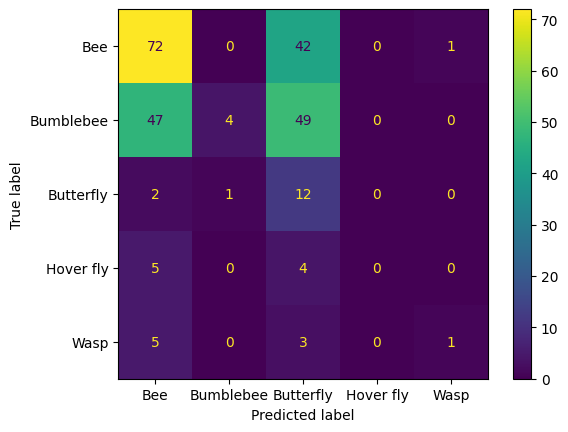

,score,transformation_name,above_mean,acceptance
column,,,,
red_rest_max,1.000000,box_cox,True,True
blue_rest_max,1.000000,box_cox,True,True
fourier_descriptor_real_1,1.000000,log,True,True
green_rest_max,1.000000,box_cox,True,True
value_rest_max,1.000000,box_cox,True,True
red_mask_max,1.000000,box_cox,True,True
blue_mask_max,1.000000,box_cox,True,True
value_mask_max,1.000000,box_cox,True,True
saturation_rest_max,1.000000,box_cox,True,True


In [124]:
try_gaussian_bayes_with_transformations(lim_X, y, best_transforms_for_gaussian_dict, 'shapiro', df_results_for_gaussian_dict, min_score=0.4)

In [ ]:
log = Pipeline([
    ('model', LogisticRegression(solver='newton-cg', random_state=RANDOM_STATE))
])
evaluate_classifier(log, X, y, cv=cv, n_jobs=1)

In [ ]:
log = Pipeline([
    ('model', LogisticRegression(solver='liblinear', random_state=RANDOM_STATE))
])
evaluate_classifier(log, X, y, cv=cv, n_jobs=1)

In [ ]:
log = Pipeline([
    ('model', OneVsRestClassifier(LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)))
])
evaluate_classifier(log, X, y, cv=cv, n_jobs=1)

In [ ]:
try_logistic_with_transformations(X, y, best_transforms_for_linear_dict, 'f_classif', df_results_dict, min_score=0, solver='liblinear')

In [ ]:
try_logistic_with_transformations(X, y, best_transforms_for_linear_dict, 'f_classif', df_results_dict, min_score=20, solver='newton-cg')

In [ ]:
try_logistic_with_transformations(X, y, best_transforms_for_linear_dict, 'f_classif', df_results_dict, min_score=30, solver='lbfgs')

In [ ]:
try_logistic_with_transformations(X, y, best_transforms_for_linear_dict, 'pearson', df_results_dict, min_score=0.21, solver='liblinear', multiclass=False)

In [ ]:
try_logistic_with_transformations(X, y, best_transforms_for_linear_dict, 'pearson', df_results_dict, min_score=0.21, solver='newton-cg')

In [ ]:
try_logistic_with_transformations(X, y, best_transforms_for_linear_dict, 'pearson', df_results_dict, min_score=0.24, solver='lbfgs')

In [ ]:
try_logistic_with_transformations(X, y, best_transforms_for_linear_dict, 'logistic_regression', df_results_dict, min_score=0.55, solver='liblinear', multiclass=False)

In [ ]:
try_logistic_with_transformations(X, y, best_transforms_for_linear_dict, 'logistic_regression', df_results_dict, min_score=0.21, solver='newton-cg')

In [ ]:
try_logistic_with_transformations(X, y, best_transforms_for_linear_dict, 'logistic_regression', df_results_dict, min_score=0, solver='lbfgs')

#### Trying with linear SVM

In [ ]:
try_linear_svm_with_transformations(X, y, best_transforms_for_linear_dict, 'f_classif', df_results_dict, min_score=0, solver='liblinear')

In [ ]:
try_linear_svm_with_transformations(X, y, best_transforms_for_linear_dict, 'f_classif', df_results_dict, min_score=0, solver='liblinear')

In [ ]:
y_encoded = labelencoder.fit_transform(y)

In [ ]:
# replace wasp and butterfly by "other" in y
y2 = y.copy()
y2[y2.isin(['Wasp','Butterfly', 'Hover fly'])] = 'Other'
y2.value_counts()
y_encoded = labelencoder.fit_transform(y2)

### b) For tree-based models (ensemble and boosting)

Tree-based models like Decision Trees, Random Forests or gradient boosting machines handle non-linearities well and are less sensitive to the scale or distribution of features. Therefore, we will rather try to create new interactions and select features that are the most important

In [34]:
# Initialize setup
from pycaret.classification import *
new_data = pd.concat([X, y], axis=1)
clf = setup(data=new_data, target='bug_type', session_id=123, 
            normalize=True,  # Normalizes the features before processing
            verbose=1)

,Description,Value
0,Session id,123
1,Target,bug_type
2,Target type,Multiclass
3,Target mapping,"Bee: 0, Bumblebee: 1, Butterfly: 2, Hover fly: 3, Wasp: 4"
4,Original data shape,"(248, 135)"
5,Transformed data shape,"(248, 135)"
6,Transformed train set shape,"(173, 135)"
7,Transformed test set shape,"(75, 135)"
8,Numeric features,134
9,Preprocess,True


In [97]:
from itertools import combinations

def generate_feature_interactions(X):
    """ Generate new features by interactions between existing features """
    new_features = pd.DataFrame(index=X.index)
    # Pairwise interactions: products, ratios, differences, sums
    for (feature_a, feature_b) in combinations(X.columns, 2):
        new_features[f'{feature_a}_x_{feature_b}'] = X[feature_a] * X[feature_b]
        new_features[f'{feature_a}_div_{feature_b}'] = X[feature_a] / (X[feature_b] + 0.0001)  # Avoid division by zero
        new_features[f'{feature_a}_plus_{feature_b}'] = X[feature_a] + X[feature_b]
        new_features[f'{feature_a}_minus_{feature_b}'] = X[feature_a] - X[feature_b]
    return new_features

def evaluate_features(X_extended, y):
    """ Evaluate feature interactions and select useful features based on a model.
    
    Args:
        X (DataFrame): Original feature set.
        y (Series): Target variable.
        threshold (float): Minimum importance a feature must have to be retained.
        n_final_features (int): If set, selects the top n most important features.
        cv (int): Number of cross-validation folds.
    """
    # Define the XGBoost model with recommended parameters
    model = XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=RANDOM_STATE,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    
    # Evaluate the model using cross-validation
    scores = cross_val_score(model, X_extended, y, cv=cv, scoring='accuracy', n_jobs=-1)
    print(f"Mean Cross-Validation Accuracy: {scores.mean()}")

    # Fit the model to the entire dataset
    model.fit(X_extended, y)
    print("Model Trained on Full Dataset")
    
    # Get feature importances
    return model
    
def select_features(model, X_extended, threshold=0.01, n_final_features=None):
    """ Select features based on importance from a trained model.
    """
    importances = model.feature_importances_
    print(f"{X_extended.shape[1]} Features Before Selection")
    if n_final_features is not None:
        # Select the top n_final_features based on importance
        indices = np.argsort(importances)[::-1][:n_final_features]
        selected_features = X_extended.columns[indices]
    else:
        # Select features based on the importance threshold
        selected_features = X_extended.columns[importances > threshold]

    # Filter the dataframe to include only selected features
    X_selected = X_extended[selected_features]
    
    print("Selected Features Based on Importance:")
    print(selected_features.values.tolist())
    plot_feature_importances(model, X_extended, plot_bottom=False, n_features=n_final_features)
    
    return X_selected

In [ ]:
X_interactions = generate_feature_interactions(lim_X)
X_extended = pd.concat([X, X_interactions], axis=1)
model = evaluate_features(X_extended, y_encoded)

2118 Features Before Selection
Selected Features Based on Importance:
['mean_centroid_distance_minus_std_centroid_distance', 'mean_centroid_distance_div_hull_triangle_similarity', 'nb_pixels_ratio_div_std_centroid_distance', 'image_symmetry_index_div_hull_area', 'nb_pixels_ratio_plus_max_centroid_distance', 'mask_compactness_minus_hull_to_insect_area_ratio', 'std_centroid_distance_div_mask_area', 'mean_centroid_distance_x_std_centroid_distance', 'mask_bb_symmetry_index_plus_min_centroid_distance', 'roundness_plus_skewness_centroid_distance', 'min_centroid_distance_x_rectangularity', 'mask_bb_symmetry_index_div_aspect_ratio', 'hull_to_insect_area_ratio_minus_rest_entropy', 'mask_compactness_div_rest_entropy', 'max_centroid_distance', 'roundness_minus_orthogonal_lines_ratio', 'hull_triangle_similarity_div_orthogonal_lines_ratio', 'min_centroid_distance_plus_body_parts_mean_length', 'min_centroid_distance_x_body_parts_mean_length', 'axis_least_inertia_y_x_body_parts_mean_length', 'nb_pixe

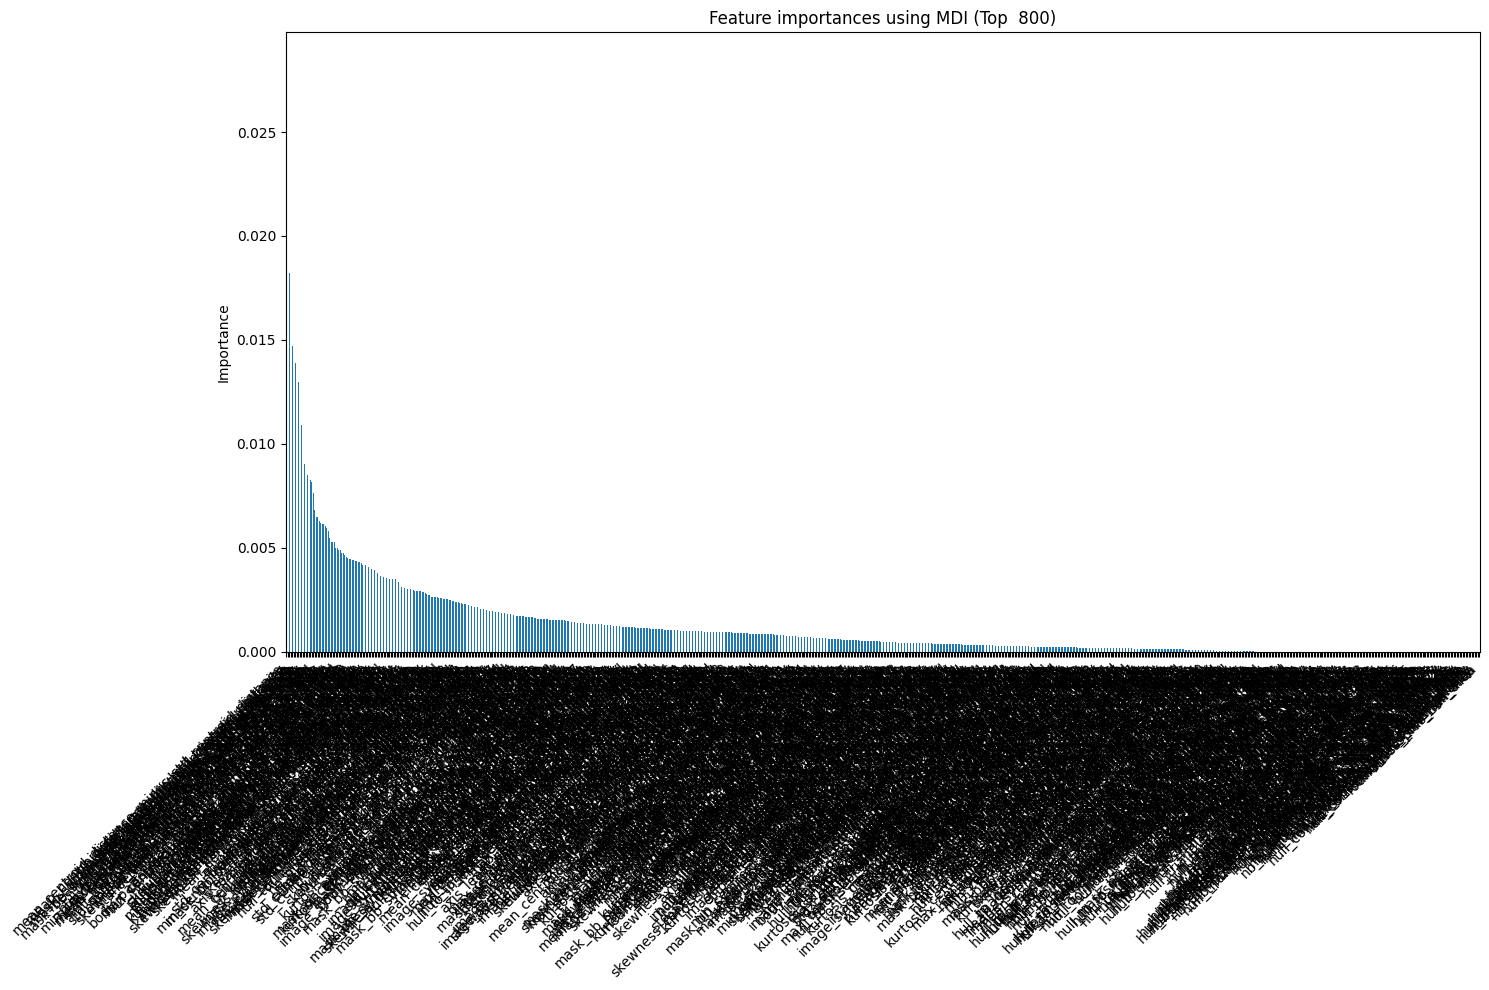

In [101]:
X_selected = select_features(model,X_extended, threshold=0.01, n_final_features=100)

### c) For gaussian methods (Gaussian Naive Bayes, Linear Discriminant Analysis)

• Models that assume the features follow a gaussian distribution like gaussian naive bayes and linear discriminant analysis may benefit from transformations that normalize the data. We identified the following transformations : 
- Logarithmic Transformations: useful for skewed data, making distributions more symmetric.
- Square Root Transformations: Stabilizes variance and reduces skewness.
- Box-Cox Transformation: Flexible transformation that can make data more Gaussian-like.
- Z-score Normalization: Standardizes features to have mean zero and unit variance.
- Rank Transformation: Converts data to ranks, which can sometimes help in making data more normal.

• Then, to evaluate each transformation, we tried the following criterias:
- Shapiro-Wilk Test: A test for normality.
- Anderson-Darling Test: Another test for normality.
- Skewness and Kurtosis: Metrics that describe the shape of the distribution.
- The cross-validated accuracy of a Gaussian Naive Bayes model on the transformed column
- log-likelihood?

In [142]:
def find_weird_features(X, threshold=10):
    weird_features = []
    for feature in X.columns:
        data = X[feature]
        kurt = kurtosis(data)
        skewness = skew(data)
        if np.abs(kurt) > threshold or np.abs(skewness) > threshold:
            weird_features.append(feature)
    return weird_features
find_weird_features(X)

['nb_pixels_ratio',
 'mask_area',
 'body_parts_mean_length',
 'blue_mask_min',
 'hue_mask_max',
 'hue_rest_max',
 'saturation_mask_min',
 'saturation_rest_min',
 'value_rest_max',
 'fourier_descriptor_real_0']

In [81]:
def safe_log(x):
    return np.log1p(np.maximum(x, 0))  # Safely log transform data

def sqrt_transform(x):
    return np.sqrt(np.maximum(x, 0))  # Square root, safe for non-negative values

def box_cox_transform(x):
    positive_x = np.maximum(x + 1, 1)  # Shift to positive to apply Box-Cox
    return boxcox(positive_x)[0]

def z_score_normalization(x):
    return (x - np.mean(x)) / np.std(x)

def rank_transform(x):
    return np.argsort(np.argsort(x))

from scipy.stats import yeojohnson
def yeo_johnson_transform(x):
    return yeojohnson(x)[0]

gaussian_transformations = {
    'log': safe_log,
    'sqrt': sqrt_transform,
    'square': power_transform_factory(2),
    'inverse': power_transform_factory(-1),
    'box_cox': box_cox_transform,
    'z_score': z_score_normalization,
    'yeo_johnson': yeo_johnson_transform,
    #'rank': rank_transform,
}

In [71]:
def find_best_transformation(df, target_2d, transformations, cv=cv, scoring='f_classif', goal='classification', 
                             verbose=False, display_df=True, debug=False):
    if 'identity' in transformations:
        transformations.pop('identity')
    transformations = {'identity': identity, **transformations}
    scoring_to_minimal_score_gain = {
        'skewness_kurtosis': 0.05, #0.05; 0.01
        'shapiro': 0.05, #0.05; 0.01
        'anderson': 0.5, #0.5; 1
        'gaussian_bayes': 0.03,
    }
    try:
        minimal_score_gain_from_default_col = scoring_to_minimal_score_gain[scoring]
    except KeyError:
        pass
    target = target_2d.squeeze()
    #print(target.shape)
    best_transforms = {}
    best_transform_names = {}
    columns = df.columns if not debug else df.columns[:2]
    for column in columns:
        if is_numeric_dtype(df[column]):
            best_score = -np.inf
            best_trans_name = None
            best_trans_func = None
            for trans_name, trans_func in transformations.items():
                if verbose: print(f'Applying transformation {trans_name} to column {column}')
                try:
                    transformed_data = trans_func(df[column].values.copy())# remove copy
                    transformed_data_2d = transformed_data.reshape(-1, 1)
                except ValueError as e:
                    if verbose: print(f"Error transforming {trans_name} for column {column}: {e}")
                    continue
                if np.any(np.isnan(transformed_data) | np.isinf(transformed_data) | np.isneginf(transformed_data)):
                    if verbose: print(f"Warning: column {column} cannot be transformed with {trans_name} because it contains NaN or Inf values")
                    continue
                try:
                    transformer = FunctionTransformer(lambda x: trans_func(x).reshape(-1, 1))
                    #transformed_data = transformer.fit_transform(df[[column]])
                    if goal == 'classification':
                        ### FOR MODELS USING LINEAR RELATIONSHIPS ###
                        if scoring == 'f_classif':
                            score = f_classif(transformed_data_2d, target)[0][0]
                        elif scoring == 'mutual_info':
                            score = mutual_info_score(transformed_data, target)
                        elif scoring == 'pearson':
                            separated_classes = [target == c for c in np.unique(target)]
                            score = np.mean([np.abs(pearsonr(transformed_data, c)[0]) for c in separated_classes])
                        elif scoring == 'chi2':
                            score = chi2(transformed_data_2d, target)[0][0]
                        elif scoring == 'logistic_regression':
                            model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE, max_iter=50)
                            score = cross_val_score(model, transformed_data_2d, target, cv=cv, scoring='accuracy').mean()
                        ### FOR MODELS USING GAUSSIAN DISTRIBUTIONS ###
                        elif scoring == 'shapiro':
                            score = np.mean([shapiro(transformed_data[target == c])[1] for c in np.unique(target)])
                        elif scoring == 'anderson':
                            score = np.mean([anderson(transformed_data[target == c])[0] for c in np.unique(target)])
                        elif scoring == 'skewness_kurtosis':
                            skewness = skew(transformed_data)
                            kurtosis_value = kurtosis(transformed_data)
                            score = custom_normality_score(skewness, kurtosis_value)
                        elif scoring == 'gaussian_bayes':
                            model = GaussianNB()
                            score = cross_val_score(model, transformed_data_2d, target, cv=cv, scoring='accuracy').mean()
                        else:
                            raise ValueError(f"Invalid scoring method {scoring} for classification")
                    else:
                        # pearson correlation
                        score = np.abs(pearsonr(transformed_data, target)[0])
                    #print(trans_name)
                    #print(f"Transformed Data Sample: {transformed_data[:5].flatten()}")
                    if (np.isnan(score)) | np.isinf(score) | np.isneginf(score):
                        if verbose: print(f"Warning: score of {trans_name} of {column} was not computed correctly ({score})")
                        continue
                    if score > best_score:
                        if (trans_name == 'identity') and (minimal_score_gain_from_default_col is not None):
                            best_score = score + minimal_score_gain_from_default_col
                        else:
                            best_score = score
                        best_trans_name = trans_name
                        best_trans_func = trans_func
                except Exception as e:
                    if verbose: print(f"Error transforming  {column} with {trans_name}: {e} ")
                    continue  # Handle errors in transformation or scoring computation
            best_transforms[column] = (best_trans_func, best_score)
            best_transform_names[column] = best_trans_name
            #if best_score < min_score_for_acceptance: print(f"Warning: no transformation for {column} achieved a score of {min_score_for_acceptance} or higher")
        else:
            if verbose:
                print(f"{column} is not a numeric column (has data type {df[col].dtype}")
    # Dataframe of score and acceptance
    df_results = pd.DataFrame(best_transforms).T
    df_results.drop(columns=0, inplace=True)
    df_results.columns = ['score']
    df_results.index.name = 'column'
    df_results['transformation_name'] = best_transform_names.values()
    #print(df_results['score'])
    score_mean = df_results['score'].mean()
    df_results['above_mean'] = df_results['score'] > score_mean
    print(f'{df_results["above_mean"].sum()} transformations above mean ({score_mean}) out of {df_results.shape[0]} ({df_results["above_mean"].mean():.2%})')
    print(f"Counts for each transformation for scoring {scoring}:", df_results['transformation_name'].value_counts())
    print(f"Information on scores : ", df_results['score'].describe())
    df_results = df_results.sort_values('score', ascending=False)
    if display_df: 
        print(f"Best transformations for each column:")
        display(HTML(df_results.to_html()))
    return best_transforms, df_results

In [82]:
scorings = ['anderson', 'shapiro', 'skewness_kurtosis','gaussian_bayes']
best_transforms_for_gaussian_dict = {}
df_results_for_gaussian_dict = {}
for scoring in scorings:
    best_transforms_for_gaussian_dict[scoring], df_results_for_gaussian_dict[scoring] = find_best_transformation(X, y_encoded, 
                                                                    gaussian_transformations, scoring=scoring, display_df=False, verbose=False)
    # Statistics on transformed data
    transformed_X = MultiColumnCachedTransformer(best_transforms_for_gaussian_dict[scoring], verbose=True).fit_transform(X2)
    display(HTML(transformed_X.describe().to_html()))

130 transformations above mean (-inf) out of 134 (97.01%)
Counts for each transformation for scoring anderson: transformation_name
identity       94
log            21
sqrt            5
box_cox         5
yeo_johnson     5
Name: count, dtype: int64
Information on scores :  count     134.0
unique    130.0
top        -inf
freq        4.0
Name: score, dtype: float64
Transforming data of shape (248, 134)
Transformed data shape: (248, 130)
Kept columns after transformation: Index(['nb_pixels_ratio', 'image_symmetry_index', 'mask_bb_symmetry_index',
       'roundness', 'mean_centroid_distance', 'std_centroid_distance',
       'max_centroid_distance', 'min_centroid_distance',
       'skewness_centroid_distance', 'kurtosis_centroid_distance',
       ...
       'fourier_descriptor_imag_5', 'fourier_descriptor_real_6',
       'fourier_descriptor_imag_6', 'fourier_descriptor_real_7',
       'fourier_descriptor_imag_7', 'fourier_descriptor_real_8',
       'fourier_descriptor_imag_8', 'fourier_descri

,nb_pixels_ratio,image_symmetry_index,mask_bb_symmetry_index,roundness,mean_centroid_distance,std_centroid_distance,max_centroid_distance,min_centroid_distance,skewness_centroid_distance,kurtosis_centroid_distance,aspect_ratio,mask_area,mask_perimeter,mask_compactness,hull_area,hull_to_insect_area_ratio,hull_convexity,hull_triangle_similarity,ellipse_angle,ellipse_axis_ratio,ellipse_eccentricity,ellipse_variance,axis_least_inertia_x,axis_least_inertia_y,rectangularity,body_parts_mean_length,body_parts_max_length,body_parts_std_length,body_parts_spread,rest_entropy,mask_entropy,red_mask_min,red_rest_min,red_mask_max,red_rest_max,red_mask_mean,red_rest_mean,red_mask_median,red_rest_median,red_mask_std,red_rest_std,red_mask_q1,red_rest_q1,red_mask_q3,red_rest_q3,green_mask_min,green_rest_min,green_mask_max,green_rest_max,green_mask_mean,green_rest_mean,green_mask_median,green_rest_median,green_mask_std,green_rest_std,green_mask_q1,green_rest_q1,green_mask_q3,green_rest_q3,blue_mask_min,blue_rest_min,blue_mask_max,blue_rest_max,blue_mask_mean,blue_rest_mean,blue_mask_median,blue_rest_median,blue_mask_std,blue_rest_std,blue_mask_q1,blue_rest_q1,blue_mask_q3,blue_rest_q3,hue_mask_mean,hue_rest_mean,hue_mask_median,hue_rest_median,hue_mask_std,hue_rest_std,hue_mask_q1,hue_rest_q1,hue_mask_q3,hue_rest_q3,saturation_mask_max,saturation_rest_max,saturation_mask_mean,saturation_rest_mean,saturation_mask_median,saturation_rest_median,saturation_mask_std,saturation_rest_std,saturation_mask_q1,saturation_rest_q1,saturation_mask_q3,saturation_rest_q3,value_mask_min,value_rest_min,value_mask_max,value_rest_max,value_mask_mean,value_rest_mean,value_mask_median,value_rest_median,value_mask_std,value_rest_std,value_mask_q1,value_rest_q1,value_mask_q3,value_rest_q3,fourier_descriptor_real_0,fourier_descriptor_imag_0,fourier_descriptor_real_1,fourier_descriptor_imag_1,fourier_descriptor_real_2,fourier_descriptor_imag_2,fourier_descriptor_real_3,fourier_descriptor_imag_3,fourier_descriptor_real_4,fourier_descriptor_imag_4,fourier_descriptor_real_5,fourier_descriptor_imag_5,fourier_descriptor_real_6,fourier_descriptor_imag_6,fourier_descriptor_real_7,fourier_descriptor_imag_7,fourier_descriptor_real_8,fourier_descriptor_imag_8,fourier_descriptor_real_9,fourier_descriptor_imag_9,orthogonal_lines_ratio
count,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,248.000000,2.480000e+02,248.000000,2.480000e+02,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,248.000000,2.480000e+02,248.000000,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,248.000000,2.480000e+02,248.000000,2.480000e+02,248.000000,2.480000e+02,248.000000,2.480000e+02,248.000000,2.480000e+02,248.000000,2.480000e+02,248.000000,2.480000e+02,248.000000,2.480000e+02
mean,1.432546e-17,-3.581365e-16,9.669684e-17,3.509737e-16,-1.43

59 transformations above mean (0.4339494474789795) out of 134 (44.03%)
Counts for each transformation for scoring shapiro: transformation_name
identity       63
box_cox        32
yeo_johnson    15
log            14
sqrt           10
Name: count, dtype: int64
Information on scores :  count     134.0
unique    122.0
top         1.0
freq       10.0
Name: score, dtype: float64
Transforming data of shape (248, 134)
Transformed data shape: (248, 119)
Kept columns after transformation: Index(['nb_pixels_ratio', 'image_symmetry_index', 'mask_bb_symmetry_index',
       'roundness', 'mean_centroid_distance', 'std_centroid_distance',
       'max_centroid_distance', 'min_centroid_distance',
       'skewness_centroid_distance', 'kurtosis_centroid_distance',
       ...
       'fourier_descriptor_imag_5', 'fourier_descriptor_real_6',
       'fourier_descriptor_imag_6', 'fourier_descriptor_real_7',
       'fourier_descriptor_imag_7', 'fourier_descriptor_real_8',
       'fourier_descriptor_imag_8', 'fo

,nb_pixels_ratio,image_symmetry_index,mask_bb_symmetry_index,roundness,mean_centroid_distance,std_centroid_distance,max_centroid_distance,min_centroid_distance,skewness_centroid_distance,kurtosis_centroid_distance,aspect_ratio,mask_area,mask_perimeter,mask_compactness,hull_area,hull_to_insect_area_ratio,hull_convexity,hull_triangle_similarity,ellipse_axis_ratio,ellipse_eccentricity,ellipse_variance,rectangularity,body_parts_mean_length,body_parts_max_length,body_parts_std_length,body_parts_spread,rest_entropy,mask_entropy,red_rest_min,red_mask_max,red_rest_max,red_mask_mean,red_rest_mean,red_mask_median,red_rest_median,red_mask_std,red_rest_std,red_mask_q1,red_rest_q1,red_mask_q3,red_rest_q3,green_mask_max,green_rest_max,green_mask_mean,green_rest_mean,green_mask_median,green_mask_std,green_rest_std,green_mask_q1,green_rest_q1,green_mask_q3,green_rest_q3,blue_mask_max,blue_rest_max,blue_mask_mean,blue_rest_mean,blue_mask_median,blue_rest_median,blue_mask_std,blue_rest_std,blue_mask_q1,blue_rest_q1,blue_mask_q3,blue_rest_q3,hue_mask_max,hue_rest_max,hue_mask_mean,hue_rest_mean,hue_rest_median,hue_mask_std,hue_rest_std,hue_rest_q1,saturation_mask_min,saturation_rest_min,saturation_mask_max,saturation_rest_max,saturation_mask_mean,saturation_rest_mean,saturation_mask_median,saturation_rest_median,saturation_mask_std,saturation_rest_std,saturation_mask_q1,saturation_mask_q3,saturation_rest_q3,value_mask_min,value_rest_min,value_mask_max,value_rest_max,value_mask_mean,value_rest_mean,value_mask_median,value_mask_std,value_rest_std,value_mask_q1,value_rest_q1,value_mask_q3,value_rest_q3,fourier_descriptor_real_0,fourier_descriptor_imag_0,fourier_descriptor_real_1,fourier_descriptor_imag_1,fourier_descriptor_real_2,fourier_descriptor_imag_2,fourier_descriptor_real_3,fourier_descriptor_imag_3,fourier_descriptor_real_4,fourier_descriptor_imag_4,fourier_descriptor_real_5,fourier_descriptor_imag_5,fourier_descriptor_real_6,fourier_descriptor_imag_6,fourier_descriptor_real_7,fourier_descriptor_imag_7,fourier_descriptor_real_8,fourier_descriptor_imag_8,fourier_descriptor_real_9,fourier_descriptor_imag_9,orthogonal_lines_ratio
count,248.000000,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,2.480000e+02,2.480000e+02,248.000000,248.000000,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02
mean,0.069288,-0.135704,0.251966,0.089956,-1.432546e-16,-1.289291e-16,1.719055e-16,0.116326,-2.865092e-17,-0.167723,0.183680,0.184218,2.148819e-16,0.089956,0.285622,-7.162729e-17,6.876220e-16,3.438110e-16,0.158611,0.151183,7.449238e-16,0.398650,0.189647,0.210960,0.060524,0.360779,0.150355,0.193191,0.094074,4.534378,29.099811,2.578583e-16,-5.443674e-16,-1.289291e-16,0.238855,0.122096,0.097591,-5.730183e-17,-8.595275e-17,-0.083158

107 transformations above mean (0.5946270736778986) out of 134 (79.85%)
Counts for each transformation for scoring skewness_kurtosis: transformation_name
yeo_johnson    49
identity       39
box_cox        33
sqrt           10
log             3
Name: count, dtype: int64
Information on scores :  count     134.000000
unique    133.000000
top         0.657949
freq        2.000000
Name: score, dtype: float64
Transforming data of shape (248, 134)
Transformed data shape: (248, 126)
Kept columns after transformation: Index(['nb_pixels_ratio', 'image_symmetry_index', 'mask_bb_symmetry_index',
       'roundness', 'mean_centroid_distance', 'std_centroid_distance',
       'max_centroid_distance', 'min_centroid_distance',
       'skewness_centroid_distance', 'kurtosis_centroid_distance',
       ...
       'fourier_descriptor_imag_5', 'fourier_descriptor_real_6',
       'fourier_descriptor_imag_6', 'fourier_descriptor_real_7',
       'fourier_descriptor_imag_7', 'fourier_descriptor_real_8',
       '

,nb_pixels_ratio,image_symmetry_index,mask_bb_symmetry_index,roundness,mean_centroid_distance,std_centroid_distance,max_centroid_distance,min_centroid_distance,skewness_centroid_distance,kurtosis_centroid_distance,aspect_ratio,mask_area,mask_perimeter,mask_compactness,hull_area,hull_to_insect_area_ratio,hull_convexity,hull_triangle_similarity,ellipse_angle,ellipse_axis_ratio,ellipse_eccentricity,ellipse_variance,axis_least_inertia_x,axis_least_inertia_y,rectangularity,body_parts_mean_length,body_parts_max_length,body_parts_std_length,body_parts_spread,rest_entropy,mask_entropy,red_mask_min,red_rest_min,red_mask_max,red_mask_mean,red_rest_mean,red_mask_median,red_rest_median,red_mask_std,red_rest_std,red_mask_q1,red_rest_q1,red_mask_q3,red_rest_q3,green_mask_min,green_rest_min,green_mask_max,green_rest_max,green_mask_mean,green_rest_mean,green_mask_median,green_rest_median,green_mask_std,green_rest_std,green_mask_q1,green_rest_q1,green_mask_q3,green_rest_q3,blue_mask_min,blue_rest_min,blue_mask_max,blue_mask_mean,blue_rest_mean,blue_mask_median,blue_rest_median,blue_mask_std,blue_rest_std,blue_mask_q1,blue_rest_q1,blue_mask_q3,blue_rest_q3,hue_mask_mean,hue_rest_mean,hue_mask_median,hue_rest_median,hue_mask_std,hue_rest_std,hue_mask_q1,hue_rest_q1,hue_mask_q3,hue_rest_q3,saturation_rest_max,saturation_mask_mean,saturation_rest_mean,saturation_mask_median,saturation_rest_median,saturation_mask_std,saturation_rest_std,saturation_mask_q1,saturation_rest_q1,saturation_mask_q3,saturation_rest_q3,value_mask_min,value_rest_min,value_mask_max,value_mask_mean,value_rest_mean,value_mask_median,value_rest_median,value_mask_std,value_rest_std,value_mask_q1,value_rest_q1,value_mask_q3,value_rest_q3,fourier_descriptor_real_0,fourier_descriptor_imag_0,fourier_descriptor_real_1,fourier_descriptor_imag_1,fourier_descriptor_real_2,fourier_descriptor_imag_2,fourier_descriptor_real_3,fourier_descriptor_imag_3,fourier_descriptor_real_4,fourier_descriptor_imag_4,fourier_descriptor_real_5,fourier_descriptor_imag_5,fourier_descriptor_real_6,fourier_descriptor_imag_6,fourier_descriptor_real_7,fourier_descriptor_imag_7,fourier_descriptor_real_8,fourier_descriptor_imag_8,fourier_descriptor_real_9,fourier_descriptor_imag_9,orthogonal_lines_ratio
count,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000,248.000000,248.000000,2.480000e+02,2.480000e+02,248.000000,2.480000e+02
mean,0.069288,0.100593,0.384278,3.509737e-16,0.342554,-0.201934,0.334883,-1.432546e-17,-2.865092e-17,-0.167723,0.183680,0.069518,-0.147016,3.509737e-16,-0.252621,0.140037,0.403138,3.438110e-16,9.490616e-17,0.125995,0.151183,0.122747,0.272491,-0.249393,0.125719,0.066247,-0.281437,-0.303938,-

67 transformations above mean (0.519713529128551) out of 134 (50.00%)
Counts for each transformation for scoring gaussian_bayes: transformation_name
identity    123
box_cox       7
log           3
sqrt          1
Name: count, dtype: int64
Information on scores :  count     134.00000
unique     73.00000
top         0.49371
freq        7.00000
Name: score, dtype: float64
Transforming data of shape (248, 134)
Transformed data shape: (248, 128)
Kept columns after transformation: Index(['nb_pixels_ratio', 'image_symmetry_index', 'mask_bb_symmetry_index',
       'roundness', 'mean_centroid_distance', 'std_centroid_distance',
       'max_centroid_distance', 'min_centroid_distance',
       'skewness_centroid_distance', 'kurtosis_centroid_distance',
       ...
       'fourier_descriptor_imag_5', 'fourier_descriptor_real_6',
       'fourier_descriptor_imag_6', 'fourier_descriptor_real_7',
       'fourier_descriptor_imag_7', 'fourier_descriptor_real_8',
       'fourier_descriptor_imag_8', 'fourie

,nb_pixels_ratio,image_symmetry_index,mask_bb_symmetry_index,roundness,mean_centroid_distance,std_centroid_distance,max_centroid_distance,min_centroid_distance,skewness_centroid_distance,kurtosis_centroid_distance,aspect_ratio,mask_area,mask_perimeter,mask_compactness,hull_area,hull_to_insect_area_ratio,hull_convexity,hull_triangle_similarity,ellipse_angle,ellipse_axis_ratio,ellipse_eccentricity,ellipse_variance,axis_least_inertia_x,axis_least_inertia_y,rectangularity,body_parts_mean_length,body_parts_max_length,body_parts_std_length,body_parts_spread,rest_entropy,mask_entropy,red_mask_min,red_rest_min,red_rest_max,red_mask_mean,red_rest_mean,red_mask_median,red_rest_median,red_mask_std,red_rest_std,red_mask_q1,red_rest_q1,red_mask_q3,red_rest_q3,green_mask_min,green_rest_min,green_mask_max,green_rest_max,green_mask_mean,green_rest_mean,green_mask_median,green_rest_median,green_mask_std,green_rest_std,green_mask_q1,green_rest_q1,green_mask_q3,green_rest_q3,blue_mask_min,blue_rest_min,blue_mask_mean,blue_rest_mean,blue_mask_median,blue_rest_median,blue_mask_std,blue_rest_std,blue_mask_q1,blue_rest_q1,blue_mask_q3,blue_rest_q3,hue_mask_max,hue_rest_max,hue_mask_mean,hue_rest_mean,hue_mask_median,hue_rest_median,hue_mask_std,hue_rest_std,hue_mask_q1,hue_rest_q1,hue_mask_q3,hue_rest_q3,saturation_rest_min,saturation_mask_max,saturation_rest_max,saturation_mask_mean,saturation_rest_mean,saturation_mask_median,saturation_rest_median,saturation_mask_std,saturation_rest_std,saturation_mask_q1,saturation_rest_q1,saturation_mask_q3,saturation_rest_q3,value_mask_min,value_rest_min,value_mask_mean,value_rest_mean,value_mask_median,value_rest_median,value_mask_std,value_rest_std,value_mask_q1,value_rest_q1,value_mask_q3,value_rest_q3,fourier_descriptor_real_0,fourier_descriptor_imag_0,fourier_descriptor_real_1,fourier_descriptor_imag_1,fourier_descriptor_real_2,fourier_descriptor_imag_2,fourier_descriptor_real_3,fourier_descriptor_imag_3,fourier_descriptor_real_4,fourier_descriptor_imag_4,fourier_descriptor_real_5,fourier_descriptor_imag_5,fourier_descriptor_real_6,fourier_descriptor_imag_6,fourier_descriptor_real_7,fourier_descriptor_imag_7,fourier_descriptor_real_8,fourier_descriptor_imag_8,fourier_descriptor_real_9,fourier_descriptor_imag_9,orthogonal_lines_ratio
count,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,248.000000,2.480000e+02,248.000000,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02
mean,1.432546e-17,-3.581365e-16,9.669684e-17,3.509737e-16,-1.4

In [53]:
def try_gaussian_bayes_with_transformations(X, y, transformations_dict, scoring, df_results_dict, **kwargs):
    model = GaussianNB()
    return try_model_with_transformations(model, X, y, transformations_dict, scoring, df_results_dict, **kwargs)
def try_lda_with_transformations(X, y, transformations_dict, scoring, df_results_dict, **kwargs):
    model = LinearDiscriminantAnalysis()
    return try_model_with_transformations(model, X, y, transformations_dict, scoring, df_results_dict, **kwargs)

Accuracy: 0.7016129032258065
Precision: 0.7818088525732875
Recall: 0.7016129032258065
F1 Score: 0.7323325504265985
              precision    recall  f1-score   support

         Bee       0.80      0.68      0.73       115
   Bumblebee       0.84      0.71      0.77       100
   Butterfly       0.87      0.87      0.87        15
   Hover fly       0.11      0.44      0.18         9
        Wasp       0.53      0.89      0.67         9

    accuracy                           0.70       248
   macro avg       0.63      0.72      0.64       248
weighted avg       0.78      0.70      0.73       248



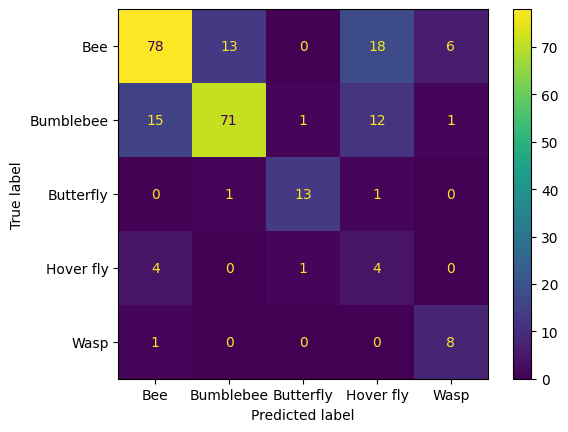

In [127]:
# Try gaussian bayes without transformation as a baseline
gb = imbPipeline([
    ('model', GaussianNB())
])
evaluate_classifier(gb, X, y, cv=cv, n_jobs=1)

In [ ]:
### DEFINING THE LISTS FOR FEATURE CATEGORIES ###

columns = X.columns
def get_remaining_features(columns, group_to_substract):
    remaining_features = [col for col in columns if col not in group_to_substract]
    print(f"Remaining features : {remaining_features}")
    return remaining_features
# Defining the color features
rgb_colors = ['red', 'green', 'blue']
hsv_colors = ['hue', 'saturation', 'value']
parts = ['mask', 'rest']
stats = ['min', 'q1','mean', 'q3', 'max','std','median']
rgb_features = [f'{color}_{part}_{stat}' for color in rgb_colors for part in parts for stat in stats]
hsv_features = [f'{color}_{part}_{stat}' for color in hsv_colors for part in parts for stat in stats]
color_features = rgb_features + hsv_features
remaining_features = get_remaining_features(columns, color_features)
# Defining the fourier descriptor features
suffix = ['real', 'imag']
fourier_features = [f'fourier_descriptor_{s}_{i}' for i in range(0, 10) for s in suffix]
remaining_features = get_remaining_features(remaining_features, fourier_features)

stats = ['min', 'mean', 'max','std','skewness', 'kurtosis']
centroid_distance_features = [f'{stat}_centroid_distance' for stat in stats]

remaining_features = get_remaining_features(remaining_features, centroid_distance_features)
# Defining the shape / geometry features
geometry_features = ["nb_pixels_ratio", "image_symmetry_index", "mask_bb_symmetry_index", "roundness", "aspect_ratio", "mask_area",
                 "mask_perimeter", "mask_compactness", "hull_area", "hull_to_insect_area_ratio", "hull_convexity", "hull_triangle_similarity", 
                 "ellipse_angle", "ellipse_axis_ratio", "ellipse_eccentricity", "ellipse_variance", "axis_least_inertia_x", "axis_least_inertia_y",
                   "rectangularity", "orthogonal_lines_ratio"]
remaining_features = get_remaining_features(remaining_features, geometry_features)

# Diving shape_features into subgroups 
size_features = ['nb_pixels_ratio', 'mask_area', 'hull_area', 'mask_perimeter']
ellipse_features = ['ellipse_angle', 'ellipse_axis_ratio', 'ellipse_eccentricity', 'ellipse_variance']
inertia_features = ['axis_least_inertia_x', 'axis_least_inertia_y']
shape_features = ['roundness', 'rectangularity', 'orthogonal_lines_ratio', 'hull_convexity', 'hull_to_insect_area_ratio', 'hull_triangle_similarity']
symmetry_features = ['image_symmetry_index', 'mask_bb_symmetry_index']
ratios = ['aspect_ratio', 'orthogonal_lines_ratio']

stat = ['mean_length','max_length', 'std_length', 'spread']
body_parts_features = [f'body_parts_{s}' for s in stat]

remaining_features = get_remaining_features(remaining_features, body_parts_features)
texture_features = ['mask_entropy','rest_entropy']

Transforming data of shape (186, 134)
Transformed data shape: (186, 134)
Kept columns after transformation: Index(['nb_pixels_ratio', 'image_symmetry_index', 'mask_bb_symmetry_index',
       'roundness', 'mean_centroid_distance', 'std_centroid_distance',
       'max_centroid_distance', 'min_centroid_distance',
       'skewness_centroid_distance', 'kurtosis_centroid_distance',
       ...
       'fourier_descriptor_imag_5', 'fourier_descriptor_real_6',
       'fourier_descriptor_imag_6', 'fourier_descriptor_real_7',
       'fourier_descriptor_imag_7', 'fourier_descriptor_real_8',
       'fourier_descriptor_imag_8', 'fourier_descriptor_real_9',
       'fourier_descriptor_imag_9', 'orthogonal_lines_ratio'],
      dtype='object', length=134)
Transformed 20 columns
Transforming data of shape (62, 134)
Transformed data shape: (62, 134)
Kept columns after transformation: Index(['nb_pixels_ratio', 'image_symmetry_index', 'mask_bb_symmetry_index',
       'roundness', 'mean_centroid_distance', 's

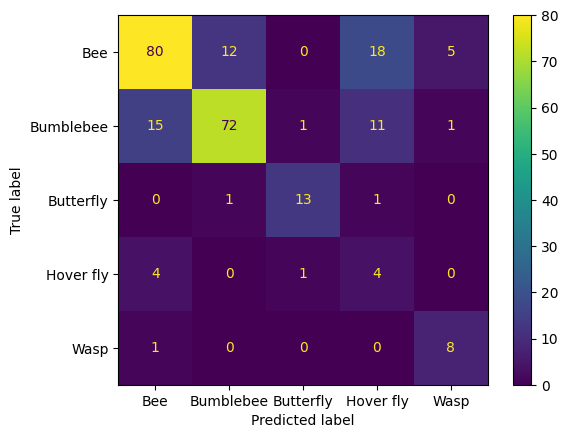

,score,transformation_name,above_mean,acceptance
column,,,,
saturation_mask_max,1.000000,box_cox,True,True
value_rest_max,1.000000,box_cox,True,True
red_rest_max,1.000000,box_cox,True,True
saturation_rest_max,1.000000,box_cox,True,True
green_rest_max,1.000000,box_cox,True,True
fourier_descriptor_real_1,1.000000,log,True,True
blue_mask_max,1.000000,box_cox,True,True
blue_rest_max,1.000000,box_cox,True,True
red_mask_max,1.000000,box_cox,True,True


In [106]:
try_gaussian_bayes_with_transformations(X, y, best_transforms_for_gaussian_dict, 'shapiro', df_results_for_gaussian_dict, min_score=0,
                                        columns_to_apply_to=fourier_features, verbose=True)

Accuracy: 0.7016129032258065
Precision: 0.7818088525732875
Recall: 0.7016129032258065
F1 Score: 0.7323325504265985
              precision    recall  f1-score   support

         Bee       0.80      0.68      0.73       115
   Bumblebee       0.84      0.71      0.77       100
   Butterfly       0.87      0.87      0.87        15
   Hover fly       0.11      0.44      0.18         9
        Wasp       0.53      0.89      0.67         9

    accuracy                           0.70       248
   macro avg       0.63      0.72      0.64       248
weighted avg       0.78      0.70      0.73       248



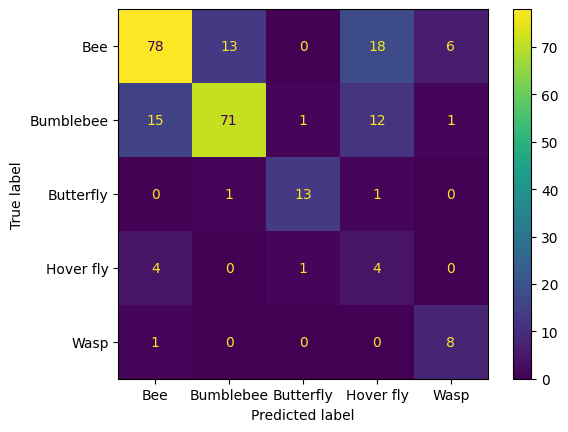

,score,transformation_name,above_mean,acceptance
column,,,,
value_rest_max,18.997543,yeo_johnson,True,True
blue_rest_max,18.126251,box_cox,True,True
saturation_mask_max,15.214237,box_cox,True,True
value_mask_max,15.090280,sqrt,True,True
red_rest_max,14.544442,identity,True,True
blue_mask_min,14.373373,box_cox,True,True
blue_mask_max,13.702769,yeo_johnson,True,True
saturation_rest_max,12.714076,yeo_johnson,True,True
red_mask_max,12.611160,sqrt,True,True


In [91]:
try_gaussian_bayes_with_transformations(X, y, best_transforms_for_gaussian_dict, 'anderson', df_results_for_gaussian_dict, min_score=12,
                                        columns_to_apply_to=[])

Accuracy: 0.4959677419354839
Precision: 0.5816400197210875
Recall: 0.4959677419354839
F1 Score: 0.3760309470310161
              precision    recall  f1-score   support

         Bee       0.49      0.98      0.66       115
   Bumblebee       0.80      0.08      0.15       100
   Butterfly       0.50      0.13      0.21        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.00      0.00      0.00         9

    accuracy                           0.50       248
   macro avg       0.36      0.24      0.20       248
weighted avg       0.58      0.50      0.38       248



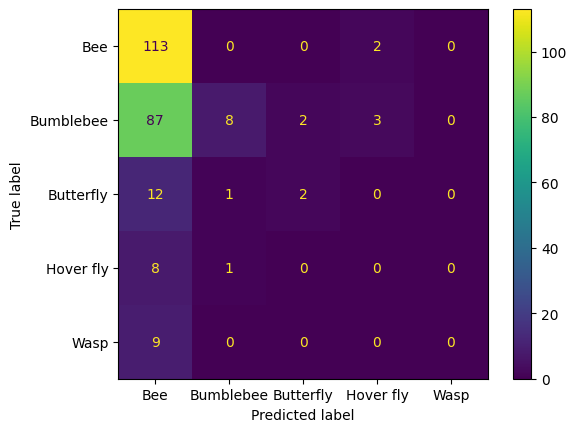

,score,transformation_name,above_mean,acceptance
column,,,,
min_centroid_distance,0.701613,sqrt,True,True
mean_centroid_distance,0.673387,log,True,True
nb_pixels_ratio,0.669355,box_cox,True,True
mask_area,0.669355,log,True,True
blue_mask_q1,0.657258,log,True,True
value_mask_q1,0.645161,box_cox,True,True
hull_area,0.641129,z_score,True,True
green_mask_q1,0.637097,box_cox,True,True
green_rest_min,0.637097,rank,True,True


In [32]:
try_gaussian_bayes_with_transformations(X, y, best_transforms_for_gaussian_dict, 'gaussian_bayes', df_results_for_gaussian_dict, min_score=0.2)

Accuracy: 0.24596774193548387
Precision: 0.21432752341311131
Recall: 0.24596774193548387
F1 Score: 0.22336657205167057
              precision    recall  f1-score   support

         Bee       0.46      0.50      0.48       115
   Bumblebee       0.00      0.00      0.00       100
   Butterfly       0.00      0.00      0.00        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.03      0.44      0.06         9

    accuracy                           0.25       248
   macro avg       0.10      0.19      0.11       248
weighted avg       0.21      0.25      0.22       248



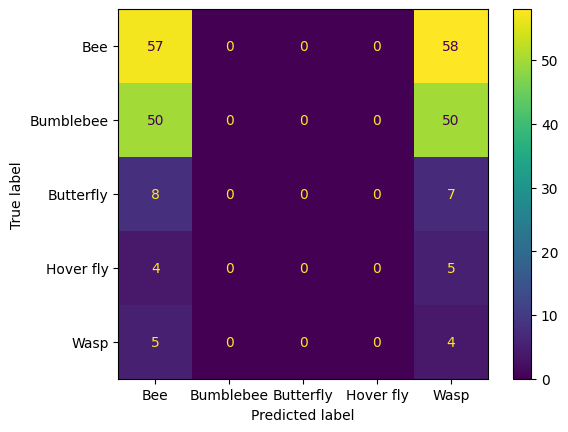

,score,transformation_name,above_mean,acceptance
column,,,,
hue_rest_q1,0.931311,sqrt,True,True
value_rest_mean,0.862121,log,True,True
red_rest_median,0.836850,box_cox,True,True
green_rest_median,0.804820,identity,True,True
hue_rest_median,0.801025,yeo_johnson,True,True
fourier_descriptor_imag_0,0.770008,identity,True,True
hue_rest_mean,0.747458,identity,True,True
fourier_descriptor_imag_2,0.741830,identity,True,True
max_centroid_distance,0.738455,sqrt,True,True


In [49]:
try_gaussian_bayes_with_transformations(X, y, best_transforms_for_gaussian_dict, 'skewness_kurtosis', df_results_for_gaussian_dict, min_score=0)

Accuracy: 0.6854838709677419
Precision: 0.6996729424423594
Recall: 0.6854838709677419
F1 Score: 0.6880929276613651
              precision    recall  f1-score   support

         Bee       0.73      0.71      0.72       115
   Bumblebee       0.72      0.74      0.73       100
   Butterfly       0.88      0.47      0.61        15
   Hover fly       0.18      0.22      0.20         9
        Wasp       0.38      0.56      0.45         9

    accuracy                           0.69       248
   macro avg       0.58      0.54      0.54       248
weighted avg       0.70      0.69      0.69       248



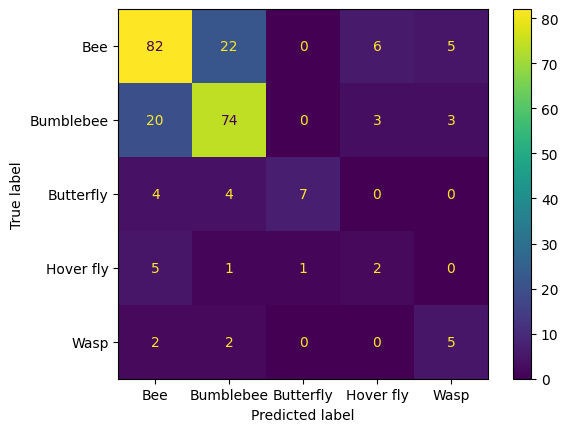

In [86]:
lda = imbPipeline([
    ('model', LinearDiscriminantAnalysis())
])
evaluate_classifier(lda, X, y, cv=cv, n_jobs=1)

Accuracy: 0.03225806451612903
Precision: 0.002367039828017976
Recall: 0.03225806451612903
F1 Score: 0.004324545482657811
              precision    recall  f1-score   support

         Bee       0.00      0.00      0.00       115
   Bumblebee       0.00      0.00      0.00       100
   Butterfly       0.00      0.00      0.00        15
   Hover fly       0.03      0.22      0.06         9
        Wasp       0.03      0.67      0.06         9

    accuracy                           0.03       248
   macro avg       0.01      0.18      0.02       248
weighted avg       0.00      0.03      0.00       248



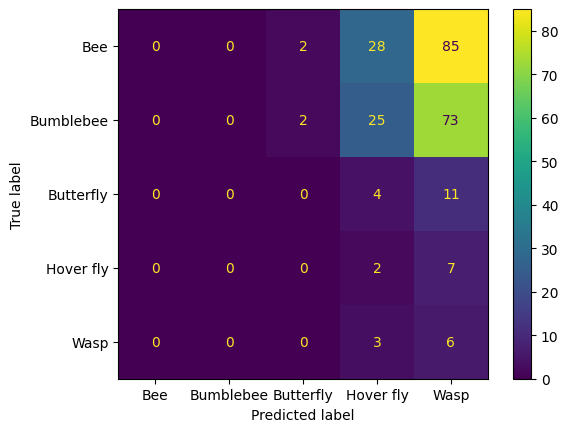

,score,transformation_name,above_mean,acceptance
column,,,,
red_rest_max,1.0,box_cox,True,True
blue_rest_max,1.0,box_cox,True,True
fourier_descriptor_real_1,1.0,log,True,True
green_rest_max,1.0,box_cox,True,True
value_rest_max,1.0,box_cox,True,True
red_mask_max,1.0,box_cox,True,True
blue_mask_max,1.0,box_cox,True,True
value_mask_max,1.0,box_cox,True,True
saturation_rest_max,1.0,box_cox,True,True


In [88]:
try_lda_with_transformations(X, y, best_transforms_for_gaussian_dict, 'shapiro', df_results_for_gaussian_dict, min_score=0.3)

Transforming data of shape (186, 134)
Transformed data shape: (186, 10)
Kept columns after transformation: Index(['axis_least_inertia_x', 'red_mask_max', 'red_rest_max', 'blue_mask_min',
       'blue_mask_max', 'blue_rest_max', 'saturation_mask_max',
       'saturation_rest_max', 'value_mask_max', 'value_rest_max'],
      dtype='object')
Transforming data of shape (62, 134)
Transformed data shape: (62, 10)
Kept columns after transformation: Index(['axis_least_inertia_x', 'red_mask_max', 'red_rest_max', 'blue_mask_min',
       'blue_mask_max', 'blue_rest_max', 'saturation_mask_max',
       'saturation_rest_max', 'value_mask_max', 'value_rest_max'],
      dtype='object')
Transforming data of shape (186, 134)
Transformed data shape: (186, 10)
Kept columns after transformation: Index(['axis_least_inertia_x', 'red_mask_max', 'red_rest_max', 'blue_mask_min',
       'blue_mask_max', 'blue_rest_max', 'saturation_mask_max',
       'saturation_rest_max', 'value_mask_max', 'value_rest_max'],
    

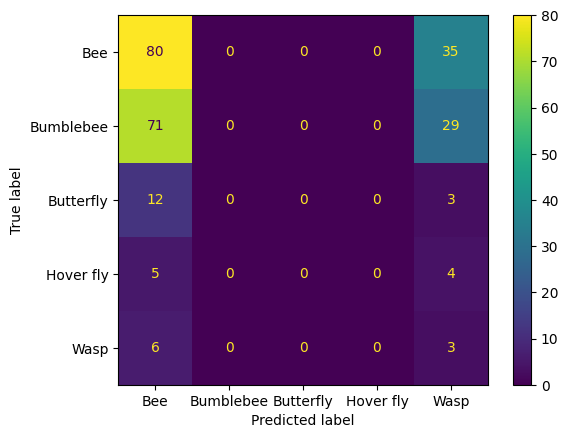

,score,transformation_name,above_mean,acceptance
column,,,,
value_rest_max,18.997543,box_cox,True,True
blue_rest_max,18.126251,box_cox,True,True
saturation_mask_max,15.214237,box_cox,True,True
value_mask_max,15.09028,sqrt,True,True
blue_mask_min,14.373373,box_cox,True,True
red_rest_max,14.072368,log,True,True
blue_mask_max,13.589845,sqrt,True,True
saturation_rest_max,12.714076,box_cox,True,True
red_mask_max,12.61116,sqrt,True,True


In [ ]:
try_lda_with_transformations(X, y, best_transforms_for_gaussian_dict, 'anderson', df_results_for_gaussian_dict, min_score=12)

Accuracy: 0.4959677419354839
Precision: 0.5816400197210875
Recall: 0.4959677419354839
F1 Score: 0.3760309470310161
              precision    recall  f1-score   support

         Bee       0.49      0.98      0.66       115
   Bumblebee       0.80      0.08      0.15       100
   Butterfly       0.50      0.13      0.21        15
   Hover fly       0.00      0.00      0.00         9
        Wasp       0.00      0.00      0.00         9

    accuracy                           0.50       248
   macro avg       0.36      0.24      0.20       248
weighted avg       0.58      0.50      0.38       248



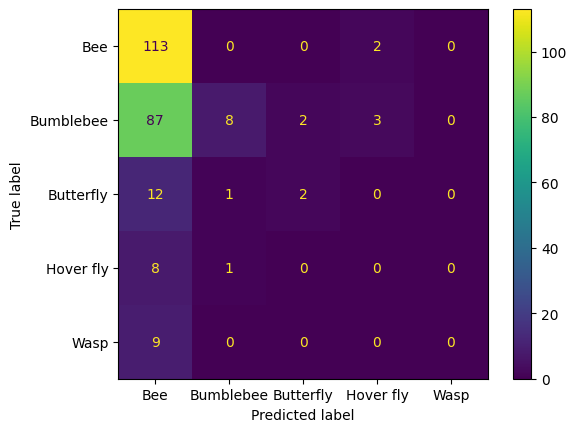

,score,transformation_name,above_mean,acceptance
column,,,,
min_centroid_distance,0.701613,sqrt,True,True
mean_centroid_distance,0.673387,log,True,True
nb_pixels_ratio,0.669355,box_cox,True,True
mask_area,0.669355,log,True,True
blue_mask_q1,0.657258,log,True,True
value_mask_q1,0.645161,box_cox,True,True
hull_area,0.641129,z_score,True,True
green_mask_q1,0.637097,box_cox,True,True
green_rest_min,0.637097,rank,True,True


In [ ]:
try_lda_with_transformations(X, y, best_transforms_for_gaussian_dict, 'gaussian_bayes', df_results_for_gaussian_dict, min_score=0.2)

## 3 - Dimensionality Reduction

(To complete)

In [ ]:
# Test without dimensionality reductor
classifier = LGBMClassifier(n_estimators=1000, learning_rate=0.05, num_leaves=32, verbose=-1, random_state=RANDOM_STATE)

classifier.fit(X, y)
pipeline1= Pipeline([
    ('model', classifier)
])
evaluate_classifier(pipeline1, X, y)

In [ ]:
importances = classifier.feature_importances_

In [ ]:
def create_dim_reductor(percent_treshold=65, n_components=0.8):
    # Identify less important features (e.g., bottom 25%)
    threshold = np.percentile(importances, percent_treshold)
    less_important_features = X.columns[importances < threshold]
    less_important_features_indices = [X.columns.get_loc(feature) for feature in less_important_features]
    # Apply PCA on less important features
    pca = PCA(n_components=n_components)
    return ColumnTransformer([('pca', pca, less_important_features_indices)], remainder='passthrough')
dim_reductor = create_dim_reductor()

In [ ]:
# Test with dimensionality reductor
pipeline2 = Pipeline([
    ('dim_reductor', dim_reductor),
    ('model', classifier)
])
evaluate_classifier(pipeline2, X, y)

# B - Data Augmentation Techniques

Data augmentation techniques like smote or adasyn can help reduce the imbalance in our data. Considering the very few number of samples for the minority classes, undersampling is not a viable option - we would have to heavily reduce the number of samples from the majority classes. instead, we are going to try oversampling the minority classes. The number of samples we will add for each minority class will be determined later when we will optimize the parameters of pipelines that include our data augmentation technique.

In [ ]:
import math
# Creating SMOTE and sampling strategy search space
smote = SMOTE(random_state=RANDOM_STATE, n_jobs=-1)
def create_sampling_strategy(factor_range=(1.4, 3.0), model='smote'):
    """
    Create a dynamic sampling strategy search space based on class counts and a factor range.
    :param class_counts: A pandas Series with index as class labels and values as counts.
    :param factor_range: A tuple specifying the min and max factors to multiply with class counts.
    :param step: Step size for the hp.quniform function.
    :return: A dictionary suitable for hyperopt's search space.
    """
    strategy = {}
    if True:
        unique, counts = np.unique(y_encoded, return_counts=True)
        class_counts = dict(zip(unique, counts))
    else:
        class_counts = y.value_counts()
    for class_label, count in class_counts.items():
        if (count < 50) and (count != 1):
            min_samples = math.ceil(count * factor_range[0])
            max_samples = math.ceil(count * factor_range[1])
            # Ensure there is a range to search
            if min_samples != max_samples:
                strategy[f'{model}__strategy__{class_label}'] = hp.uniformint(
                    f'sampling_{class_label}', min_samples, max_samples)
    if model == 'smote':
        strategy[f'{model}__k_neighbors'] = hp.choice('k_neighbors', [3, 4, 5, 6])
    elif model == 'adasyn':
        strategy[f'{model}__n_neighbors'] = hp.choice('n_neighbors', [3, 4, 5, 6])
    return strategy
smote_sampling_strategy_space = create_sampling_strategy(model='smote')

In [ ]:
# Creating ADASYN 
adasyn_sampling_strategy_space = create_sampling_strategy(model='adasyn')
adasyn = ADASYN(random_state=RANDOM_STATE, n_jobs=-1)

In [ ]:
def validate_float32(X_transformed):
    """
    Check if each column in the DataFrame can be safely converted to float32.

    Args:
    - X_transformed (DataFrame): The DataFrame containing transformed data.

    Returns:
    - dict: Information about each column's ability to be represented as float32.
    """
    validation_results = {}
    for column in X_transformed.columns:
        col_data = X_transformed[column]
        col_min = col_data.min()
        col_max = col_data.max()
        
        # Check for NaN and infinity values
        has_nan = np.isnan(col_data).any()
        has_inf = np.isinf(col_data).any()
        
        # Check if the range of data is within the float32 precision
        can_represent = np.all(np.isfinite(np.float32(col_data)))
        
        # Report the results
        validation_results[column] = {
            'min': col_min,
            'max': col_max,
            'has_nan': has_nan,
            'has_inf': has_inf,
            'can_represent_float32': can_represent
        }
        
        # Print summary for each column
        print(f"Column: {column}")
        print(f"  Min value: {col_min}")
        print(f"  Max value: {col_max}")
        print(f"  Contains NaN: {has_nan}")
        print(f"  Contains Inf: {has_inf}")
        print(f"  Can represent as float32: {can_represent}\n")

    return validation_results

validation_results = validate_float32(X)
validation_results

In [ ]:
# [IMPORTANT] Must execute all above cells before testing algorithms below

# C - Application of machine learning or deep learning algorithms

## Clustering (unsupervised learning) methods

Here, because we have the ground truth (we know the labels), it may be better to use algorithms which have the number of clusters as the main parameter. Indeed, as parameterization is an important factor in performance, if we already know the optimal value for a parameter, it is a significant advantage. We will also try other algorithms but they will probably not work as well and will require more parameterization work.

### Algorithms with n_clusters as parameter

In [ ]:
#forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances = pd.Series(importances, index=X.columns)
forest_importances.sort_values(ascending=False, inplace=True)
k = 30
top_k_features = forest_importances.index[:k]
indices_of_top_k_features = [X.columns.get_loc(feature) for feature in top_k_features]
lim_X = scaled_X[:, indices_of_top_k_features]

In [ ]:
kmeans = KMeans(n_clusters=n_classes,random_state=12)
evaluate_clustering(kmeans, lim_X, y, plot=False)

In [ ]:
#search_space = {
#    'linkage': hp.choice('linkage', ['ward'])
#}
hac = AgglomerativeClustering(linkage='ward', n_clusters=n_classes)
#best_params = optimize_clustering(hac, search_space, max_evals=100, scoring='accuracy')
evaluate_clustering(hac, lim_X, y, plot=False)

In [ ]:
gmm = GaussianMixture(n_components=n_classes)
evaluate_clustering(gmm, lim_X, y, plot=False)

In [ ]:
spectral = SpectralClustering(n_clusters=n_classes,affinity ='nearest_neighbors',n_neighbors=8)
evaluate_clustering(spectral, lim_X, y, plot=False)

In [ ]:
birch = Birch(n_clusters=n_classes)
evaluate_clustering(birch, lim_X, y, plot=False)

### Algorithms without n_clusters as parameter

We have tested the most common clustering algorithms that allow us to set the number of clusters. For the sake of testing we will try with DBSCAN, but it is harder to parametrize here and we will proably have to deal with outliers (points with no vcluster).

**TO DO**

## Classification (supervised learning) methods that are neither deep nor ensemble learning

In [ ]:
# Logistic regression on scaled data
search_space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(10)),  # Regularization strength
    'penalty': hp.choice('penalty', [ 'l2']),
    'solver': hp.choice('solver', ['lbfgs', 'liblinear'])
}
log = imbPipeline([('scaler', StandardScaler()), 
                   ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(log, X, y)

In [ ]:
# Logistic regression on unscaled data (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
search_space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(100)),  # Regularization strength
    'penalty': hp.choice('penalty', [ 'l2']),
    'solver': hp.choice('solver', ['lbfgs', 'liblinear'])
}
log = imbPipeline([ 
    ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space,{}, max_evals=150, scoring='accuracy')
#{'C': 0.02544670436123156, 'penalty': 'l2', 'solver': 'liblinear'}
evaluate_classifier(log, X, y)

In [ ]:
# Logistic regression on unscaled data (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
search_space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(100)),  # Regularization strength
    'penalty': hp.choice('penalty', [ 'l2']),
    'solver': hp.choice('solver', ['lbfgs', 'liblinear'])
}
log = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space, smote_sampling_strategy_space, max_evals=150, scoring='accuracy')
#{'C': 0.02544670436123156, 'penalty': 'l2', 'solver': 'liblinear'}
evaluate_classifier(log, X, y)

In [ ]:
# Logistic regression on unscaled data with l1
search_space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(100)),  # Regularization strength
    'penalty': hp.choice('penalty', [ 'l1']),
    'solver': hp.choice('solver', ['liblinear'])
}
log = imbPipeline([ 
    ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space,{}, max_evals=150, scoring='accuracy')
#{'C': 0.02544670436123156, 'penalty': 'l2', 'solver': 'liblinear'}
evaluate_classifier(log, X, y)

In [ ]:
# Logistic regression on unscaled data with SMOTE
log = imbPipeline([ 
    ('smote', smote),
    ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(log, X, y)

In [ ]:
# Logistic regression on unscaled data with SMOTE
log = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(log, X, y)

In [ ]:
log = imbPipeline([ 
    ('adasyn', adasyn),
    ('model', LogisticRegression())])
best_params = optimize_classifier(X, log, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(log, X, y)

In [ ]:
# Nearest Neighbors on scaled data 
knn = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())])

# Hyperparameter space for KNN
search_space = {
    'n_neighbors': hp.uniformint('n_neighbors', 1,25),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.choice('p', [1, 2, 3])  # Power parameter for the Minkowski metric
}

best_params = optimize_classifier(X, knn, search_space, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(knn, X, y)

In [ ]:
# Nearest Neighbors on scaled data with dimensionality reduction first (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
knn = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())])

# Hyperparameter space for KNN
search_space = {
    'n_neighbors': hp.uniformint('n_neighbors', 1,25),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.choice('p', [1, 2, 3])  # Power parameter for the Minkowski metric
}

best_params = optimize_classifier(X, knn, search_space, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(knn, X, y)

In [ ]:
# Nearest Neighbors on scaled data with dimensionality reduction after
knn = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('dim_reductor', dim_reductor),
    ('model', KNeighborsClassifier())])

# Hyperparameter space for KNN
search_space = {
    'n_neighbors': hp.uniformint('n_neighbors', 1,25),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.choice('p', [1, 2, 3])  # Power parameter for the Minkowski metric
}

best_params = optimize_classifier(X, knn, search_space, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(knn, X, y)

In [ ]:
common_params = {
    'C': hp.loguniform('C', np.log(0.01), np.log(10)), 
}
poly_params = {
    **common_params,
    'kernel': 'poly',
    'degree': hp.choice('poly_degree', [2, 3, 4, 5]),  # Degree of the polynomial kernel function
    'gamma': hp.choice('poly_gamma', ['scale', 'auto']),
    'coef0': hp.uniform('poly_coef0', 0, 10)  # Independent term in kernel function
}

rbf_params = {
    **common_params,
    'kernel': 'rbf',
    'gamma': hp.choice('rbf_gamma', ['scale', 'auto'])
}

sigmoid_params = {
    **common_params,
    'kernel': 'sigmoid',
    'gamma': hp.choice('sigmoid_gamma', ['scale', 'auto']),
    'coef0': hp.uniform('sigmoid_coef0', 0, 10)  # Independent term in kernel function
}

In [ ]:
# Polynomial SVM on scaled data
poly_svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('model', SVC(max_iter=10000))])

# Hyperparameter space for SVC
best_params = optimize_classifier(X, poly_svc, poly_params, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(poly_svc, X, y)

In [ ]:
# Polynomial SVM on scaled data with smote
poly_svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC(max_iter=10000))])

# Hyperparameter space for SVC
best_params = optimize_classifier(X, poly_svc, poly_params, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(poly_svc, X, y)

In [ ]:
# Polynomial SVM on scaled data with smote and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
poly_svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC(max_iter=10000))])
best_params = optimize_classifier(X, poly_svc, poly_params, {}, max_evals=1000, scoring='accuracy')
evaluate_classifier(poly_svc, X, y)

In [ ]:
# Polynomial SVM on scaled data with adasyn
poly_svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', SVC(max_iter=10000))])
best_params = optimize_classifier(X, poly_svc, poly_params, adasyn_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(poly_svc, X, y)

In [ ]:
# Polynomial SVM on scaled data with adasyn and dimensionality reduction
poly_svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', SVC(max_iter=10000))])
best_params = optimize_classifier(X, poly_svc, poly_params, adasyn_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(poly_svc, X, y) 

In [ ]:
# RBF SVM on scaled data without SMOTE
rbf_svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('model', SVC())])

# Hyperparameter space for SVC
best_params = optimize_classifier(X, rbf_svc, rbf_params, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(rbf_svc, X, y)

In [ ]:
# RBF SVM on scaled data with SMOTE
rbf_svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC())])

# Hyperparameter space for SVC
best_params = optimize_classifier(X, rbf_svc, rbf_params, smote_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(rbf_svc, X, y)

In [ ]:
# RBF SVM on scaled data with SMOTE and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
rbf_svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC())])
best_params = optimize_classifier(X, rbf_svc, rbf_params, smote_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(rbf_svc, X, y)

In [ ]:
# RBF SVM on scaled data with ADASYN
rbf_svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', SVC())])
best_params = optimize_classifier(X, rbf_svc, rbf_params, adasyn_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(rbf_svc, X, y)

In [ ]:
# RBF SVM on scaled data with ADASYN and dimensionality reduction
rbf_svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', SVC())])
best_params = optimize_classifier(X, rbf_svc, rbf_params, adasyn_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(rbf_svc, X, y)

In [ ]:
# Sigmoid SVM on scaled data without SMOTE
svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('model', SVC())])
best_params = optimize_classifier(X, svc, sigmoid_params, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(svc, X, y)

In [ ]:
# Sigmoid SVM on scaled data without SMOTE and with dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
sigmoid_svc = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', SVC())])
best_params = optimize_classifier(X, sigmoid_svc, sigmoid_params, {}, max_evals=400, scoring='accuracy')
evaluate_classifier(sigmoid_svc, X, y)

In [ ]:
# Sigmoid SVM on scaled data with SMOTE
svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC())])
best_params = optimize_classifier(X, svc, sigmoid_params, smote_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(svc, X, y)

In [ ]:
# Sigmoid SVM on scaled data with SMOTE and dimensionality reduction
svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC())])
best_params = optimize_classifier(X, svc, sigmoid_params, smote_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(svc, X, y)

In [ ]:
# Sigmoid SVM on scaled data with ADASYN
svc = imbPipeline([ 
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', SVC())])
best_params = optimize_classifier(X, svc, sigmoid_params, adasyn_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(svc, X, y)

In [ ]:
# Gaussian Naive Bayes on scaled data
nb = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', GaussianNB())
])
evaluate_classifier(nb, X, y)

In [ ]:
# Gaussian Naive Bayes on unscaled data
nb = imbPipeline([
    ('model', GaussianNB())
])
evaluate_classifier(nb, X, y)


In [ ]:
# Gaussian Naive Bayes on unscaled data and with SMOTE
nb = imbPipeline([
    ('smote', smote),
    ('model', GaussianNB())
])
evaluate_classifier(nb, X, y)


In [ ]:
# Gaussian Naive Bayes on unscaled data and with dimensionality reduction
nb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('model', GaussianNB())
])
evaluate_classifier(nb, X, y)

In [ ]:
# Another model using gaussian distribution


In [ ]:
# Decision Tree on scaled data
dt = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier())
])
search_space = {
    'max_depth': hp.choice('max_depth', range(1, 21)),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 11)),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
}
best_params = optimize_classifier(X, dt, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(dt, X, y)

In [ ]:
# Decision Tree on unscaled data
dt = imbPipeline([
    ('model', DecisionTreeClassifier())
])
best_params = optimize_classifier(X, dt, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(dt, X, y)

In [ ]:
# Decision Tree on unscaled data and with dimensionality reduction
dt = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('model', DecisionTreeClassifier())
])
best_params = optimize_classifier(X, dt, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(dt, X, y)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# LDA on scaled data
lda = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', LinearDiscriminantAnalysis())
])
search_space = {
    'solver': hp.choice('solver', [ 'lsqr']),
    'shrinkage': hp.choice('shrinkage', ['auto', None] + list(np.linspace(0, 1, 100))),
}
best_params = optimize_classifier(X, lda, search_space, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(lda, X, y)

In [ ]:
# LDA on scaled data and with dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
lda = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', LinearDiscriminantAnalysis())
])
best_params = optimize_classifier(X, lda, search_space, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(lda, X, y)

In [ ]:
# LDA on scaled data with SMOTE and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
lda = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LinearDiscriminantAnalysis())
])
best_params = optimize_classifier(X, lda, search_space, smote_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(lda, X, y)

In [ ]:
# LDA on scaled data with SMOTE
lda = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LinearDiscriminantAnalysis())
])
best_params = optimize_classifier(X, lda, search_space, smote_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(lda, X, y)

In [ ]:
# LDA on scaled data with ADASYN
lda = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', LinearDiscriminantAnalysis())
])
best_params = optimize_classifier(X, lda, search_space, adasyn_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(lda, X, y)

In [ ]:
# LDA on scaled data with ADASYN and dimensionality reduction
lda = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', LinearDiscriminantAnalysis())
])
best_params = optimize_classifier(X, lda, search_space, adasyn_sampling_strategy_space, max_evals=200, scoring='accuracy')
evaluate_classifier(lda, X, y)

In [ ]:
# LDA on unscaled data
lda = imbPipeline([
    ('model', LinearDiscriminantAnalysis())
])
best_params = optimize_classifier(X, lda, search_space, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(lda, X, y)

In [ ]:
# Gaussian Process on scaled data
from sklearn.gaussian_process import GaussianProcessClassifier
from scipy.optimize import fmin_tnc, fmin_cg, fmin_cobyla, fmin_l_bfgs_b, fmin_slsqp, fmin_powell, fmin_ncg

gp = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', GaussianProcessClassifier())
])
search_space = {
    'n_restarts_optimizer': hp.uniformint('n_restarts_optimizer', 0, 1000),
    'max_iter_predict': hp.uniformint('max_iter_predict', 10, 1000),
    'optimizer': hp.choice('optimizer', [fmin_tnc, fmin_cg, fmin_cobyla, fmin_l_bfgs_b, fmin_slsqp, fmin_powell, fmin_ncg]),
    'multi_class': hp.choice('multi_class', ['one_vs_rest', 'one_vs_one']),

}
best_params = optimize_classifier(X, gp, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(gp, X, y)

## Ensemble classification methods

In [ ]:
# Extra Trees on scaled data
et = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', ExtraTreesClassifier())
])
search_space2 = {
    'n_estimators': hp.uniformint('n_estimators', 10, 250),
    'max_depth': hp.uniformint('max_depth', 1, 40),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.uniformint('min_samples_leaf', 1, 15),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
}
search_space = {
    'n_estimators': hp.choice('n_estimators', [10,50, 100, 150, 200, 250]),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30, 40]),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4, 8, 16, 32]),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
}

best_params = optimize_classifier(X, et, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

In [ ]:
# Extra Trees on unscaled data
et = imbPipeline([
    ('model', ExtraTreesClassifier())
])
best_params = optimize_classifier(X, et, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

In [ ]:
# Extra Trees on scaled data with SMOTE
et = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', ExtraTreesClassifier())
])
best_params = optimize_classifier(X, et, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')

In [ ]:
# Extra Trees on scaled data with ADASYN
et = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', ExtraTreesClassifier())
])
best_params = optimize_classifier(X, et, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

In [ ]:
# Extra Trees on scaled data with ADASYN
et = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', ExtraTreesClassifier())
])
et.set_params(**{'model__max_depth': 30, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 0.10291991900958453, 'model__n_estimators': 100})
best_params = optimize_classifier(X, et, {}, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

In [ ]:
# Extra Trees on scaled data with ADASYN and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
et = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', ExtraTreesClassifier())
])
et.set_params(**{'model__max_depth': 30, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 0.10291991900958453, 'model__n_estimators': 100})
best_params = optimize_classifier(X, et, {}, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

In [ ]:
# Extra Trees on scaled data with ADASYN
et = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', ExtraTreesClassifier())
])
best_params = optimize_classifier(X, et, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

In [ ]:
# Extra Trees on scaled data with ADASYN
et = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', ExtraTreesClassifier())
])
best_params = optimize_classifier(X, et, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

In [ ]:
# Extra Trees on scaled data with adasyn and dimensionality reduction 
et = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', ExtraTreesClassifier())
])
best_params = optimize_classifier(X, et, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(et, X, y)

In [ ]:
# Random Forest on scaled data
rf = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])
search_space = {
    'n_estimators': hp.choice('n_estimators', [50, 100, 150, 200, 250]),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30, 40]),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4, 8, 16, 32]),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
}
best_params = optimize_classifier(X, rf, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(rf, X, y)

In [ ]:
# Random Forest on scaled data with SMOTE
rf = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', RandomForestClassifier())
])
best_params = optimize_classifier(X, rf, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(rf, X, y)

In [ ]:
# Random Forest on scaled data with ADASYN
rf = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', RandomForestClassifier())
])
best_params = optimize_classifier(X, rf, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(rf, X, y)

In [ ]:
# Random Forest on unscaled data
rf = imbPipeline([
    ('model', RandomForestClassifier())
])
best_params = optimize_classifier(X, rf, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(rf, X, y)

In [ ]:
# Random Forest on unscaled data with SMOTE
rf = imbPipeline([
    ('smote', smote),
    ('model', RandomForestClassifier())
])
best_params = optimize_classifier(X, rf, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(rf, X, y)

In [ ]:
# Random Forest on unscaled data with ADASYN
rf = imbPipeline([
    ('adasyn', adasyn),
    ('model', RandomForestClassifier())
])
best_params = optimize_classifier(X, rf, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(rf, X, y)

In [ ]:
# LGBM on scaled data
lgb = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', LGBMClassifier())
])
search_space = {
    'num_leaves': hp.choice('num_leaves', [10, 20, 30, 40, 50]),
    'max_depth': hp.choice('max_depth', [5, 10, 15, -1]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'min_child_samples': hp.choice('min_child_samples', [5, 10, 20, 30]),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}
best_params = optimize_classifier(X, lgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

In [ ]:
# LGBM on scaled data with dimensionality reduction
lgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', LGBMClassifier())
])
search_space = {
    'num_leaves': hp.choice('num_leaves', [10, 20, 30, 40, 50]),
    'max_depth': hp.choice('max_depth', [5, 10, 15, -1]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'min_child_samples': hp.choice('min_child_samples', [5, 10, 20, 30]),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}
best_params = optimize_classifier(X, lgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

In [ ]:
# LGBM on scaled data with SMOTE
lgb = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LGBMClassifier())
])
best_params = optimize_classifier(X, lgb, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

In [ ]:
# LGBM on scaled data with SMOTE and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
lgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LGBMClassifier())
])
best_params = optimize_classifier(X, lgb, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

In [ ]:
# LGBM on scaled data with ADASYN
lgb = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', LGBMClassifier())
])
best_params = optimize_classifier(X, lgb, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

In [ ]:
# LGBM on unscaled data
lgb = imbPipeline([
    ('model', LGBMClassifier())
])
best_params = optimize_classifier(X, lgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

In [ ]:
# LGBM on unscaled data with dimensionality reduction
lgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('model', LGBMClassifier())
])
best_params = optimize_classifier(X, lgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

In [ ]:
# LGBM on unscaled data with SMOTE and dimensionality reduction
lgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('smote', smote),
    ('model', LGBMClassifier())
])
best_params = optimize_classifier(X, lgb, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, X, y)

#### XGBOOST

In [ ]:
np.log(0.2)

In [ ]:
# XGB on scaled data
xgb = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier())
])
search_space = {
    'max_depth': hp.uniformint('max_depth', 1, 40),  # Maximum tree depth
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'n_estimators': hp.uniformint('n_estimators', 10, 400),  # Number of trees
    'min_child_weight': hp.choice('min_child_weight', [1, 2, 3, 4, 5]),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}
best_params = optimize_classifier(X, xgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(xgb, X, y)

In [ ]:
# XGBoost on scaled data with SMOTE
xgb = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', XGBClassifier())
])
best_params = optimize_classifier(X, xgb, search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(xgb, X, y)

In [ ]:
# XGBoost on scaled data with SMOTE and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
xgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', XGBClassifier())
])
best_params = optimize_classifier(X, xgb, search_space, smote_sampling_strategy_space, max_evals=50, scoring='accuracy')
evaluate_classifier(xgb, X, y)

In [ ]:
# XGBoost on scaled data with ADASYN
xgb = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', XGBClassifier())
])
best_params = optimize_classifier(X, xgb, search_space, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(xgb, X, y)

In [ ]:
# XGBoost on unscaled data
xgb = imbPipeline([
    ('model', XGBClassifier())
])
best_params = optimize_classifier(X, xgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(xgb, X, y)

In [ ]:
# XGBoost on unscaled data with SMOTE and dimensionality reduction
xgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('smote', smote),
    ('model', XGBClassifier())
])
best_params = optimize_classifier(X, xgb, search_space, smote_sampling_strategy_space, max_evals=50, scoring='accuracy')
evaluate_classifier(xgb, X, y)

In [ ]:
# AdaBoost on scaled data
ada = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', AdaBoostClassifier())
])
search_space = {
    'n_estimators': hp.uniformint('n_estimators', 10, 400),  # Number of trees
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.4)),
}
best_params = optimize_classifier(X, ada, search_space, {}, max_evals=30, scoring='accuracy')
evaluate_classifier(ada, X, y)

#### CatBoost

In [ ]:
# Cat Boost on scaled data with smote and dimensionality reduction
cat = imbPipeline([
    
    ('scaler', StandardScaler()),
    ('model', CatBoostClassifier())
])
search_space = {
    'iterations': hp.choice('iterations', [50, 100, 150, 200, 250]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'depth': hp.choice('depth', [4, 6, 8, 10]),
}
best_params = optimize_classifier(X, cat, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(cat, X, y)

In [ ]:
# CatBoost on unscaled data
cat = imbPipeline([
    ('model', CatBoostClassifier())
])
search_space = {
    'iterations': hp.choice('iterations', [50, 100, 150, 200, 250]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'depth': hp.choice('depth', [4, 6, 8, 10]),
}
best_params = optimize_classifier(X, cat, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(cat, X, y)

## Supervised neural network algorithms using our own features

### Loading images and masks

### Creating the model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.base import BaseEstimator, ClassifierMixin
from torch.optim import Adam
from sklearn.model_selection import cross_val_score

class DynamicNet(nn.Module):
    def __init__(self, input_size, num_classes, layers_sizes, dropout=0.001, activation=nn.ReLU()):
        super(DynamicNet, self).__init__()
        self.layers = nn.ModuleList()
        last_size = input_size
        self.activation = activation
        self.dropout = nn.Dropout(dropout)

        for size in layers_sizes:
            self.layers.append(nn.Linear(last_size, size))
            last_size = size

        self.output = nn.Linear(last_size, num_classes)

    def forward(self, x):
        for layer in self.layers:
            x = self.activation(layer(x))
        return self.output(x)

class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, num_classes, layers_sizes=[100, 50], epochs=10, learning_rate=1e-3):
        self.input_size = input_size
        self.num_classes = num_classes
        self.layers_sizes = layers_sizes
        self.epochs = epochs
        self.learning_rate = learning_rate


    def build_model(self):
        self.model = DynamicNet(self.input_size, self.num_classes, self.layers_sizes)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = Adam(self.model.parameters(), lr=self.learning_rate)

    def fit(self, X, y):
        self.num_classes = len(np.unique(y))
        self.input_size = X.shape[1]
        self.build_model()
        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.LongTensor(y)
        
        for _ in range(self.epochs):
            self.optimizer.zero_grad()
            outputs = self.model(X_tensor)
            loss = self.criterion(outputs, y_tensor)
            loss.backward()
            self.optimizer.step()

    def predict(self, X):
        with torch.no_grad():
            X_tensor = torch.FloatTensor(X)
            outputs = self.model(X_tensor)
            _, predicted = torch.max(outputs.data, 1)
        return predicted.numpy()

    def predict_proba(self, X):
        with torch.no_grad():
            X_tensor = torch.FloatTensor(X)
            outputs = F.softmax(self.model(X_tensor), dim=1)
        return outputs.numpy()
    
    def set_params(self, **params):
        if 'layers_sizes' in params:
            self.layers_sizes = params['layers_sizes']
        if 'epochs' in params:
            self.epochs = params['epochs']
        if 'learning_rate' in params:
            self.learning_rate = params['learning_rate']
        self.build_model()
        return self

def cross_validate_pytorch_model(clf, X, y, cv=4, scoring='accuracy'):

    # Perform cross-validation
    scores = cross_val_score(clf, X, y, cv=cv, scoring=scoring)

    # Print results
    print(f'Cross-validation scores: {scores}')
    print(f'Mean score: {np.mean(scores)}')

    return scores

# Define the model architecture parameters
input_size = X.shape[1]
layers_sizes = [100, 50]

In [ ]:
torch.manual_seed(RANDOM_STATE)

In [ ]:
# Neural network on scaled data with SMOTE and dimensionality reduction
net = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])

In [ ]:
net_search_space = {
    'num_layers': hp.choice('num_layers', np.arange(1, 15, 1, dtype=int)),  # choose between the number of layers
    'units_per_layer': hp.choice('units_per_layer', [
        [hp.randint(f'units_layer_{i}_{j}', 20, 150) for i in range(j)]  # each layer can have between 50 to 150 units
        for j in range(1, 5)  # corresponding to the number of layers chosen
    ]),
    'epochs': hp.uniformint('epochs', 5, 25),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-1)),
    'activation': hp.choice('activation', [nn.ReLU(), nn.Tanh()]),
    'dropout': hp.loguniform('dropout', 1e-5, 0.1)
}

best_params = optimize_classifier(X, net, net_search_space, smote_sampling_strategy_space, max_evals=1000, scoring='accuracy')
evaluate_classifier(net, X, y)

In [ ]:
best_params = {'model__activation': nn.ReLU(), 'model__compression_ratio': 0.5904518404397917, 'model__dropout': 1.0098282022106495, 'model__epochs': 20, 'model__learning_rate': 0.010317788530071006, 'model__min_layer_size': 16, 'model__num_layers': 4, 'smote__k_neighbors': 4, 'smote__strategy__2': 23, 'smote__strategy__3': 14, 'smote__strategy__4': 26}
adapt_sampling_strategy(net, best_params, 'smote')
adapt_pytorch_layers_sizes(X,best_params)
net.set_params(**best_params)
evaluate_classifier(net, X, y)

In [ ]:
net_search_space2 = {
    'num_layers': hp.uniformint('num_layers', 1, 15),  # choose between the number of layers
    'compression_ratio': hp.uniform('compression_ratio', 0.5, 0.9),
    'min_layer_size': hp.uniformint('min_layer_size', 8, 30),
    'epochs': hp.uniformint('epochs', 5, 25),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-1)),
    'activation': hp.choice('activation', [nn.ReLU(), nn.Tanh()]),
    'dropout': hp.loguniform('dropout', 1e-5, 0.1)
}

best_params = optimize_classifier(X, net, net_search_space2, smote_sampling_strategy_space, max_evals=1000, scoring='accuracy')
evaluate_classifier(net, X, y)

search_space = {
    'layers_sizes': hp.choice('layers_sizes', [[100, 50], [100, 50, 25], [200, 100, 50]]),
    'epochs': hp.uniformint('epochs', 5, 20),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-1))
}

In [ ]:
net_search_space = {
    'num_layers': hp.choice('num_layers', np.arange(1, 15, 1, dtype=int)),  # choose between the number of layers
    'units_per_layer': hp.choice('units_per_layer', [
        [hp.randint(f'units_layer_{i}_{j}', 20, 150) for i in range(j)]  # each layer can have between 50 to 150 units
        for j in range(1, 5)  # corresponding to the number of layers chosen
    ]),
    'epochs': hp.uniformint('epochs', 5, 25),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-1)),
    'activation': hp.choice('activation', [nn.ReLU(), nn.Tanh()]),
    'dropout': hp.loguniform('dropout', 1e-5, 0.1)
}

In [ ]:
# Neural network on unscaled data
net = imbPipeline([
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])

# Perform the cross-validation
optimize_classifier(X, net, net_search_space, {}, max_evals=10, scoring='accuracy')
evaluate_classifier(net, X, y)

In [ ]:
# Neural network on scaled data
net = imbPipeline([
    ('scaler', StandardScaler()),
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])

optimize_classifier(X, net, net_search_space, {}, max_evals=150, scoring='accuracy')
evaluate_classifier(net, X, y)

In [ ]:
# Neural network on scaled data with SMOTE
net = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])
best_params = optimize_classifier(X, net, net_search_space, smote_sampling_strategy_space, max_evals=150, scoring='accuracy')
evaluate_classifier(net, X, y)

In [ ]:
# Neural network on scaled data with ADASYN
net = imbPipeline([
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])
best_params = optimize_classifier(X, net, net_search_space, adasyn_sampling_strategy_space, max_evals=150, scoring='accuracy')
evaluate_classifier(net, X, y)

In [ ]:
# Neural network on scaled data with ADASYN and dimensionality reduction
net = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])
#best_params = optimize_classifier(X, net, net_search_space, adasyn_sampling_strategy_space, max_evals=1, scoring='accuracy')
evaluate_classifier(net, X, y)

In [ ]:
# Neural network on scaled data with SMOTE and dimensionality reduction
dim_reductor_net = create_dim_reductor(percent_treshold=75, n_components=0.9)
net = imbPipeline([
    ('dim_reductor', dim_reductor_net),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])
best_params = optimize_classifier(X, net, net_search_space, smote_sampling_strategy_space, max_evals=100, scoring='accuracy')
evaluate_classifier(net, X, y)

In [ ]:
# Neural network on scaled data with SMOTE and dimensionality reduction
net = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])
best_params = optimize_classifier(X, net, net_search_space, smote_sampling_strategy_space, max_evals=1, scoring='accuracy')
evaluate_classifier(net, X, y)

#### Trial with skorch (unsuccessful - worse score)

import torch
import torch.nn as nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

class DynamicNet(nn.Module):
    def __init__(self, input_size, num_classes, num_units=10, num_layers=2, nonlin=nn.ReLU()):
        super(DynamicNet, self).__init__()
        self.layers = nn.ModuleList()
        last_size = input_size
        self.nonlin = nonlin

        for _ in range(num_layers - 1):
            self.layers.append(nn.Linear(last_size, num_units))
            last_size = num_units  # Output of one layer is input to the next

        # Final layer
        self.output = nn.Linear(last_size, num_classes)

    def forward(self, x):
        x = x.float()
        for layer in self.layers:
            x = self.nonlin(layer(x))
        return self.output(x)

class DynamicNet(nn.Module):
    def __init__(self, input_size, num_classes, layers_sizes, nonlin=nn.ReLU()):
        super(DynamicNet, self).__init__()
        self.layers = nn.ModuleList()
        last_size = input_size
        self.nonlin = nonlin

        for size in layers_sizes:
            self.layers.append(nn.Linear(last_size, size))
            last_size = size

        self.output = nn.Linear(last_size, num_classes)

    def forward(self, x):
        for layer in self.layers:
            x = self.nonlin(layer(x))
        return self.output(x)
    
class CustomPyTorchClassifier(NeuralNetClassifier):
    def __init__(self, module=DynamicNet, criterion=nn.CrossEntropyLoss, optimizer=torch.optim.Adam, *args, **kwargs):
        super(CustomPyTorchClassifier, self).__init__(module, *args, **kwargs)

    def set_params(self, **params):
        super().set_params(**params)
        self.initialize()  # Re-initialize the network with new parameters

# Usage example:
input_size = X.shape[1]  # Assuming X is already defined and preprocessed
num_classes = len(np.unique(y))  # Assuming y is your label array

net = CustomPyTorchClassifier(
    module=DynamicNet,
    module__input_size=input_size,
    module__num_classes=num_classes,
    module__num_units=50,
    module__num_layers=2,
    module__nonlin=nn.ReLU(),
    max_epochs=10,
    lr=0.1,
    iterator_train__shuffle=True,
    verbose=0
)

param_grid = {
    'lr': [1e-3,0.01, 0.02, 0.03],
    'module_layers_sizes': [[100, 50], [100, 50, 25], [100, 50, 25, 10]],
    'module__nonlin': [nn.ReLU(), nn.Tanh()]
}

gs = GridSearchCV(net, param_grid, refit=True, cv=cv, scoring='accuracy')
gs.fit(X_scaled.astype(np.float32), y_encoded.astype(np.int64))
print(gs.best_score_, gs.best_params_)
net = CustomPyTorchClassifier(
    module=DynamicNet,
    module__input_size=input_size,
    module__num_classes=num_classes,
    module__layers_sizes = [100, 50],
    module__nonlin=nn.ReLU(),
    max_epochs=10,
    lr=1e-1,
    iterator_train__shuffle=True,
    verbose=0,
    batch_size=5
)
scores = cross_validate_pytorch_model(net, X_scaled.astype(np.float32), y_encoded.astype(np.int64), cv=cv, scoring='accuracy')


## Supervised neural network algorithms using optimally auto-encoded features

### Create a custom autoencoder class and training function

In [ ]:

class CustomAutoencoder(nn.Module):
    def __init__(self, input_size, layers_sizes):
        super(CustomAutoencoder, self).__init__()
        self.encoder = nn.ModuleList()
        self.decoder = nn.ModuleList()

        # Create the encoder layers
        last_size = input_size
        for size in layers_sizes:
            self.encoder.append(nn.Linear(last_size, size))
            last_size = size
        
        # Create the decoder layers (reverse order of encoder)
        for size in reversed(layers_sizes[:-1]):
            self.decoder.append(nn.Linear(last_size, size))
            last_size = size
        self.decoder.append(nn.Linear(last_size, input_size))

    def forward(self, x):
        # Encoder
        for layer in self.encoder:
            x = F.relu(layer(x))
        
        # Decoder
        for layer in self.decoder:
            x = F.relu(layer(x))
        
        return x
    
    def encode(self, x):
        for layer in self.encoder:
            x = F.relu(layer(x))
        return x
    
def train_autoencoder(model, train_loader, epochs, optimizer, criterion, val_loader=None):
    # Training loop
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            reconstructed = model(data)
            loss = criterion(reconstructed, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
        if val_loader is not None:
            # Validation
            model.eval()
            val_loss = 0
            with torch.no_grad():
                for data, target in val_loader:
                    reconstructed = model(data)
                    loss = criterion(reconstructed, target)
                    val_loss += loss.item()
    if val_loader is not None:
        return val_loss / len(val_loader)
    else:
        return train_loss / len(train_loader)
    
def create_autoencoder(input_size, layers_sizes, learning_rate):
    model = CustomAutoencoder(input_size=input_size, layers_sizes=layers_sizes)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    return model, criterion, optimizer


### Find the best hyper parameters for our auto encoder

In [ ]:
# Find the best hyper parameters for our auto encoder
from torch.utils.data import DataLoader, TensorDataset
from hyperopt import Trials
input_size = X.shape[1]

def autoencoder_objective(params):
    # Unpack parameters
    #layers_sizes = params['layers_sizes']
    learning_rate = params['learning_rate']
    epochs = params['epochs']
    num_layers = params['num_layers']
    compression_ratio = params['compression_ratio']
    min_layer_size = params['min_layer_size']

    layers_sizes = get_layers_sizes(input_size, num_layers, compression_ratio, min_layer_size)
    
    # Convert numpy array to torch tensor
    train_loader = DataLoader(tensor_dataset, batch_size=10, shuffle=True)
    val_loader = DataLoader(tensor_dataset, batch_size=10)
    
    # Initialize model
    model, criterion, optimizer = create_autoencoder(input_size, layers_sizes, learning_rate)

    loss = train_autoencoder(model, train_loader, epochs, optimizer, criterion, val_loader=val_loader)
    return {'loss': loss, 'status': 'ok'}

search_space = {
    'num_layers': hp.uniformint('num_layers', 3, 7), 
    'compression_ratio': hp.uniform('compression_ratio', 0.5, 0.9),
    'min_layer_size': hp.choice('min_layer_size', [10,20,30,40]),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-1)),
    'epochs': hp.uniformint('epochs', 5, 100)
}

X_tensor = torch.from_numpy(scaled_X).float()
tensor_dataset = TensorDataset(X_tensor, X_tensor)  # features are the same as targets
trials = Trials()
best = fmin(
    fn=autoencoder_objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=15,
    trials=trials
)

print('Best parameters:', space_eval(search_space, best))

### Encoding the dataset

In [ ]:
def apply_autoencoder(model, train_loader, epochs, optimizer, criterion):
    train_autoencoder(model, train_loader, epochs, optimizer, criterion)
    model.eval()
    encoded_features = []
    with torch.no_grad():
        for data, _ in train_loader:
            encoded = model.encode(data)
            encoded_features.extend(encoded.cpu().detach().numpy())  # Adjust here for GPU if necessary
    
    return np.array(encoded_features)

In [ ]:
# Assuming best_params are filled from the output of fmin
final_layers_sizes = get_layers_sizes(input_size, int(best['num_layers']), best['compression_ratio'], best['min_layer_size'])
final_autoencoder, criterion, optimizer = create_autoencoder(input_size, final_layers_sizes, best['learning_rate'])
data_loader = DataLoader(tensor_dataset, batch_size=10, shuffle=True)

# Extract encoded features
auto_encoded_X = apply_autoencoder(final_autoencoder, data_loader, int(best['epochs']), optimizer, criterion)
print('Auto encoded features shape:', auto_encoded_X.shape)

### Testing algorithms on auto encoded features

In [ ]:
# Logistic regression on autoencoded data
search_space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(100)),  # Regularization strength
    'penalty': hp.choice('penalty', ['l2']),
    'solver': hp.choice('solver', ['lbfgs', 'liblinear'])
}
log = imbPipeline([
    ('model', LogisticRegression())
])
best_params = optimize_classifier(X, log, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(log, auto_encoded_X, y)

In [ ]:
# XGBoost on autoencoded data
xgb = imbPipeline([
    ('model', XGBClassifier())
])
search_space = {
    'max_depth': hp.choice('max_depth', [3, 4, 5, 6, 7, 8, 9, 10]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'n_estimators': hp.choice('n_estimators', [50, 100, 150, 200, 250]),
    'min_child_weight': hp.choice('min_child_weight', [1, 2, 3, 4, 5]),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}
best_params = optimize_classifier(X, xgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(xgb, auto_encoded_X, y)

In [ ]:
# LGBM on autoencoded data
lgb = imbPipeline([
    ('model', LGBMClassifier())
])
search_space = {
    'num_leaves': hp.choice('num_leaves', [10, 20, 30, 40, 50]),
    'max_depth': hp.choice('max_depth', [5, 10, 15, -1]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'min_child_samples': hp.choice('min_child_samples', [5, 10, 20, 30]),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}
best_params = optimize_classifier(X, lgb, search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(lgb, auto_encoded_X, y)

In [ ]:
# RBF SVM on autoencoded data
rbf_svc = imbPipeline([ 
    ('model', SVC())])
best_params = optimize_classifier(X, rbf_svc, rbf_params, {}, max_evals=200, scoring='accuracy')
evaluate_classifier(rbf_svc, auto_encoded_X, y)

In [ ]:
# Neural network on autoencoded data
net = imbPipeline([
    ('model', PyTorchClassifier(input_size, n_classes, layers_sizes))
])
search_space = {
    'num_layers': hp.choice('num_layers', np.arange(1, 20, 1, dtype=int)),  # choose between the number of layers
    'units_per_layer': hp.choice('units_per_layer', [
        [hp.randint(f'units_layer_{i}_{j}', 20, 150) for i in range(j)]  # each layer can have between 50 to 150 units
        for j in range(1, 5)  # corresponding to the number of layers chosen
    ]),
    'epochs': hp.uniformint('epochs', 5, 25),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-4), np.log(1e-1)),
    'activation': hp.choice('activation', [nn.ReLU(), nn.Tanh()]),
    'dropout': hp.loguniform('dropout', 1e-5, 0.1)
}
best_params = optimize_classifier(X, net, search_space, {}, max_evals=10, scoring='accuracy')
evaluate_classifier(net, auto_encoded_X, y)

## Final hyperparameter tuning for the best models found

In [ ]:
MAX_EVALS = 1000
MEDIUM_MAX_EVALS = 500
HIGH_MAX_EVALS = 2000
# Nearest Neighbors on scaled data with dimensionality reduction first (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
knn_search_space = {
    'n_neighbors': hp.uniformint('n_neighbors', 1,25),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.choice('p', [1, 2, 3])  # Power parameter for the Minkowski metric
}
knn = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())])

best_params_knn = optimize_classifier(X, knn, knn_search_space, {}, max_evals=400, scoring='accuracy')

# Logistic regression on unscaled data (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
log_search_space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(100)),  # Regularization strength
    'penalty': hp.choice('penalty', [ 'l2']),
    'solver': hp.choice('solver', ['lbfgs', 'liblinear'])
}
log = imbPipeline([ 
    ('model', LogisticRegression())])
best_params_log = optimize_classifier(X, log, log_search_space,{}, max_evals=250, scoring='accuracy')
#{'C': 0.02544670436123156, 'penalty': 'l2', 'solver': 'liblinear'}

# Polynomial SVM on scaled data with smote and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
common_params = {
    'C': hp.loguniform('C', np.log(0.01), np.log(10)), 
}
poly_params = {
    **common_params,
    'kernel': 'poly',
    'degree': hp.choice('poly_degree', [2, 3, 4, 5]),  # Degree of the polynomial kernel function
    'gamma': hp.choice('poly_gamma', ['scale', 'auto']),
    'coef0': hp.uniform('poly_coef0', 0, 10)  # Independent term in kernel function
}

rbf_params = {
    **common_params,
    'kernel': 'rbf',
    'gamma': hp.choice('rbf_gamma', ['scale', 'auto'])
}

sigmoid_params = {
    **common_params,
    'kernel': 'sigmoid',
    'gamma': hp.choice('sigmoid_gamma', ['scale', 'auto']),
    'coef0': hp.uniform('sigmoid_coef0', 0, 10)  # Independent term in kernel function
}
poly_svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC(max_iter=10000))])


poly_svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC(max_iter=10000))])
best_params_poly_svc = optimize_classifier(X, poly_svc, poly_params, {}, max_evals=MAX_EVALS, scoring='accuracy')

# RBF SVM on scaled data with SMOTE and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
rbf_svc = imbPipeline([ 
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', SVC())])
best_params_rbf_svc = optimize_classifier(X, rbf_svc, rbf_params, smote_sampling_strategy_space, max_evals=250, scoring='accuracy')


# Sigmoid SVM on scaled data without SMOTE and with dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
sigmoid_svc = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', SVC())])
best_params_sigmoid_svc = optimize_classifier(X, sigmoid_svc, sigmoid_params, {}, max_evals=MAX_EVALS, scoring='accuracy')


# LDA on scaled data and with dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
lda_search_space = {
    'solver': hp.choice('solver', [ 'lsqr']),
    'shrinkage': hp.choice('shrinkage', ['auto', None] + list(np.linspace(0, 1, 100))),
}
lda = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('model', LinearDiscriminantAnalysis())
])
best_params_lda = optimize_classifier(X, lda, lda_search_space, {}, max_evals=MEDIUM_MAX_EVALS, scoring='accuracy')


# Extra Trees on scaled data with ADASYN and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
et = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('adasyn', adasyn),
    ('model', ExtraTreesClassifier())
])
et.set_params(**{'model__max_depth': 30, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 0.10291991900958453, 'model__n_estimators': 100})
best_params_et = optimize_classifier(X, et, {}, adasyn_sampling_strategy_space, max_evals=100, scoring='accuracy')


# LGBM on scaled data with SMOTE and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
lgb_search_space = {
    'num_leaves': hp.choice('num_leaves', [10, 20, 30, 40, 50]),
    'max_depth': hp.choice('max_depth', [5, 10, 15, 20, 30, 40]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'min_child_samples': hp.choice('min_child_samples', [5, 10, 20, 30]),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}
lgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LGBMClassifier())
])
best_params_lgb = optimize_classifier(X, lgb, lgb_search_space, smote_sampling_strategy_space, max_evals=HIGH_MAX_EVALS, scoring='accuracy')


# XGBoost on scaled data with SMOTE and dimensionality reduction (BEST PIPELINE FOR THIS MODEL - EXECUTE THIS FOR FINAL META MODEL)
xgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', XGBClassifier())
])
xgb_search_space = {
    'max_depth': hp.uniformint('max_depth', 1, 40),  # Maximum tree depth
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'n_estimators': hp.uniformint('n_estimators', 10, 400),  # Number of trees
    'min_child_weight': hp.choice('min_child_weight', [1, 2, 3, 4, 5]),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
}
best_params_xgb = optimize_classifier(X, xgb, xgb_search_space, smote_sampling_strategy_space, max_evals=HIGH_MAX_EVALS, scoring='accuracy')

In [ ]:
xgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', XGBClassifier())
])
params = {'model__colsample_bytree': 0.5618472160586284, 'model__learning_rate': 0.14696877676067954, 'model__max_depth': 31, 'model__min_child_weight': 1, 'model__n_estimators': 168, 'model__subsample': 0.7370250265837791, 'smote__k_neighbors': 5, 'smote__strategy__2': 39, 'smote__strategy__3': 26, 'smote__strategy__4': 23}
params = adapt_sampling_strategy(xgb, params, 'smote')
xgb.set_params(model__random_state=RANDOM_STATE, **params)

lgb = imbPipeline([
    ('dim_reductor', dim_reductor),
    ('scaler', StandardScaler()),
    ('smote', smote),
    ('model', LGBMClassifier())
])
params = {'model__colsample_bytree': 0.5336697486387387, 'model__learning_rate': 0.044019954596397556, 'model__max_depth': 30, 'model__min_child_samples': 5, 'model__num_leaves': 50, 'model__subsample': 0.7415082602672014, 'smote__k_neighbors': 3, 'smote__strategy__2': 29, 'smote__strategy__3': 22, 'smote__strategy__4': 25}
params = adapt_sampling_strategy(lgb, params, 'smote')
lgb.set_params(model__random_state=RANDOM_STATE, **params)

evaluate_classifier(xgb, X, y)
evaluate_classifier(lgb, X, y)


In [ ]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=2)

## Saving the algorithms

In [ ]:
SAVE_DIR = 'models/'

In [ ]:
#xgb.save_model(SAVE_DIR + 'xgb.bin')
#lgb.save_model(SAVE_DIR + 'lgb.txt')
#cb.save_model(SAVE_DIR + 'cat.cbm')
sklearn_models = {
    'log': log,
    'knn': knn,
    'poly_svc': poly_svc,
    'rbf_svc': rbf_svc,
    'sigmoid_svc': sigmoid_svc,
    'lda': lda,
    'et': et,
    'lgb': lgb,
    'xgb': xgb,
    #'net': net
}
for name, model in sklearn_models.items():
    joblib.dump(model, SAVE_DIR + f'{name}.joblib')

In [ ]:
sklearn_models = {'lgb': lgb}
for name, model in sklearn_models.items():
    joblib.dump(model, SAVE_DIR + name + '.pkl')

## Loading the algorithms

In [ ]:
SAVE_DIR = 'models/'

In [ ]:
def load_models_from_directory():
    """
    Automatically loads models based on file extensions from the specified directory.
    
    Args:
    - save_dir (str): Directory containing the model files.

    Returns:
    - dict: A dictionary with model names as keys and loaded model objects as values.
    """
    models = {}
    for filename in os.listdir(SAVE_DIR):
        filepath = os.path.join(SAVE_DIR, filename)
        model_name, extension = os.path.splitext(filename)
        try:
            if extension == '.joblib':
                model = joblib.load(filepath)
            elif extension == '.bin':
                model = xgb.Booster()  # initialize an empty model
                model.load_model(filepath)
            elif extension == '.txt':  # assuming this is for LightGBM
                model = lgb.Booster(model_file=filepath)
            elif extension == '.cbm':
                model = cb.CatBoost()
                model.load_model(filepath)
            else:
                continue
            models[model_name] = model
            print(f"Loaded {model_name} from {filename}")
        except Exception as e:
            print(f"Failed to load {model_name} from {filename}: {e}")
        if model_name == 'lgb':
            #models['lgb'].named_steps['model'].set_params(**{ 'min_gain_to_split': 1e-3})
            #models['lgb'].named_steps['model'].set_params(**{'verbose': -1})
            print('Set LGBM parameters: ', models['lgb'].named_steps['model'].get_params())

    #for model in models.values(): model.set_params(**{'model__random_state': RANDOM_STATE})
    return models

models = load_models_from_directory()
models_list = list(models.values())
models_tuples = [(name, model) for name, model in models.items()]

## Meta algorithms

### VotingClassifier

In [ ]:
def calculate_weights(scores, method='exponential', base=2):
    """
    Calculate weights based on normalized scores and a chosen method.
    """
    if method == 'exponential':
        weights = [base ** score if score != -1 else 0 for score in scores]
    elif method == 'power':
        weights = [score ** base if score != -1 else 0 for score in scores]
    elif method == 'linear':
        weights = [(score * (base - 1) + 1) if score != -1 else 0 for score in scores]
    else:
        raise ValueError("Unsupported method. Choose from 'exponential', 'power', 'linear'.")
    return weights

def set_dynamic_weights(pipelines_dict, X, y, scoring='accuracy', method='exponential', base=2, print_results=True, min_acceptable_score=None,
                        n_jobs=-1):
    """
    Assign weights to models based on their cross-validation scores using different methods.
    """
    pipelines = list(pipelines_dict.values())
    pipeline_names = list(pipelines_dict.keys())
    scores = [np.mean(cross_val_score(pipeline, X, y_encoded, cv=cv, scoring=scoring, n_jobs=n_jobs)) for pipeline in pipelines]
    scores_above_threshold = [score for score in scores if score >= min_acceptable_score] if min_acceptable_score is not None else scores
    min_score = min(scores_above_threshold)
    max_score = max(scores)
    # Normalize scores to the [0, 1] interval
    min_acceptable_score = min_score if min_acceptable_score is None else min_acceptable_score
    normalized_scores = [(score - min_score) / (max_score - min_score) if score >= min_acceptable_score else -1 for score in scores]

    # Calculate weights based on the chosen method
    weights = calculate_weights(normalized_scores, method, base)
    if print_results:
        for i, pipeline in enumerate(pipelines):
            print(f'{pipeline_names[i]} {pipeline.steps[-1][0]}: {scores[i]:.4f} (weight: {weights[i]:.4f})')
            if weights[i] == 0:
                print(f"Model {pipeline_names[i]} was assigned a weight of 0 due to low score.")
    return weights


In [ ]:
# Without dynamic weights
voting_clf = VotingClassifier(
    estimators=models_tuples,
    voting='hard',  # 'hard' for majority voting
)
voting_pipe = imbPipeline([
    ('model', voting_clf)
])
evaluate_classifier(voting_pipe, X, y)

In [ ]:
# With dynamic weights
weights = set_dynamic_weights(models, X, y_encoded, method='exponential', base=6, min_acceptable_score=0.8)
voting_clf = VotingClassifier(
    estimators=models_tuples,
    voting='hard',  # 'hard' for majority voting
    weights=weights
)
voting_pipe = imbPipeline([
    ('model', voting_clf)
])
evaluate_classifier(voting_pipe, X, y)

In [ ]:
from sklearn.base import clone

# Function to ensure all classifiers can predict probabilities
def prepare_estimators_with_probabilities(models_dict):
    models_tuples = []
    for name, pipeline in models_dict.items():
        # Clone the entire pipeline first
        new_pipeline = clone(pipeline)
        model = new_pipeline.named_steps['model']
        
        # Check if the model is of a class that typically requires enabling probabilities
        if hasattr(model, 'probability') and not model.probability:
            # Set probability parameter to True
            model.set_params(probability=True)
        elif not hasattr(model, 'predict_proba'):
            raise ValueError(f"The model {name} does not support probability predictions and cannot be adjusted to do so.")
        
        # After updating the model in the cloned pipeline, append to list
        models_tuples.append((name, new_pipeline))
    
    return models_tuples

models_tuples = prepare_estimators_with_probabilities(models)
models_tuples_proba = prepare_estimators_with_probabilities(models)
models_tuples_proba = [(name, pipeline) for name, pipeline in models_tuples_proba]
voting_clf = VotingClassifier(
    estimators=models_tuples_proba,
    voting='soft',  # Change to 'soft' for using probabilities
    weights=weights
)

voting_pipe = imbPipeline([
    ('model', voting_clf)
])

evaluate_classifier(voting_pipe, X, y)


In [ ]:
scores = []
for i in range(10,20):
    print('Testing random state ', i)
    cv2 = StratifiedKFold(n_splits=4, random_state=i, shuffle=True)
    check_splits(X, y, cv2)
    accuracy = evaluate_classifier(voting_pipe, X, y, cv=cv2)
    scores.append(accuracy)
print(f"Mean accuracy: {np.mean(scores):.4f}")

### StackingClassifier

In [ ]:
cv.verbose = -1
models['et'].named_steps['adasyn'].get_params()

In [ ]:
for model in models_list:
    print(model)

In [ ]:
# Meta-model (can be any other classifier)
models2 = models.copy()
models2['et'].named_steps['adasyn'].n_neighbors = models2['et'].named_steps['adasyn'].n_neighbors - 1
models2['et'].named_steps['adasyn'].n_neighbors
meta_model = LGBMClassifier()
meta_model_search_space = {
    'final_estimator__num_leaves': hp.choice('final_estimator__num_leaves', [10, 20, 30, 40, 50]),
    'final_estimator__max_depth': hp.choice('final_estimator__max_depth', [5, 10, 15, 20, 30, 40]),
    'final_estimator__learning_rate': hp.loguniform('final_estimator__learning_rate', np.log(0.01), np.log(0.2)),
    'final_estimator__min_child_samples': hp.choice('final_estimator__min_child_samples', [5, 10, 20, 30]),
    'final_estimator__subsample': hp.uniform('final_estimator__subsample', 0.5, 1),
    'final_estimator__colsample_bytree': hp.uniform('final_estimator__colsample_bytree', 0.5, 1),
}

# This ensures that the search space now correctly targets parameters of the final_estimator

# Create the stacking classifier
stack_clf = StackingClassifier(
    estimators=[(name, model) for name, model in models2.items()],
    final_estimator=meta_model,
    n_jobs=1
)
stack_pipe = imbPipeline([
    ('model', stack_clf)
])
#best_params_stack = optimize_classifier(X, stack_pipe, meta_model_search_space, {}, max_evals=100, scoring='accuracy')
evaluate_classifier(stack_pipe, X, y, n_jobs=1)


# Identify dragonfly

In [ ]:
def evaluate_anomaly_detection(model, X, y_true):
    """
    Fit and evaluate an anomaly detection model.
    y_true should contain 1 for normal and -1 for anomalies (the dragonfly).
    """
    model.fit(X)
    y_pred = model.predict(X)  # Predictions: 1 for normal, -1 for anomaly
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
y_anomaly = np.ones(len(X), dtype=int)  # All other points are normal
y_anomaly[dragonfly_data.index] = -1   # Mark the dragonfly data as an anomaly


# Final Predictions

In [ ]:
anomalies = iso_forest.predict(X)
final_predictions = meta_model.predict(X)
final_predictions[anomalies == -1] = 'Dragonfly'
evaluate_predictions(meta_model, y, final_predictions)